In [1]:
import numpy as np
import cupy as cp
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('INFO')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import cgi_phasec_poppy as cgi
from cgi_phasec_poppy import misc

from wfsc import efc_2dm_broad as efc
from wfsc import utils



INFO:numexpr.utils:Note: detected 96 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 96 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


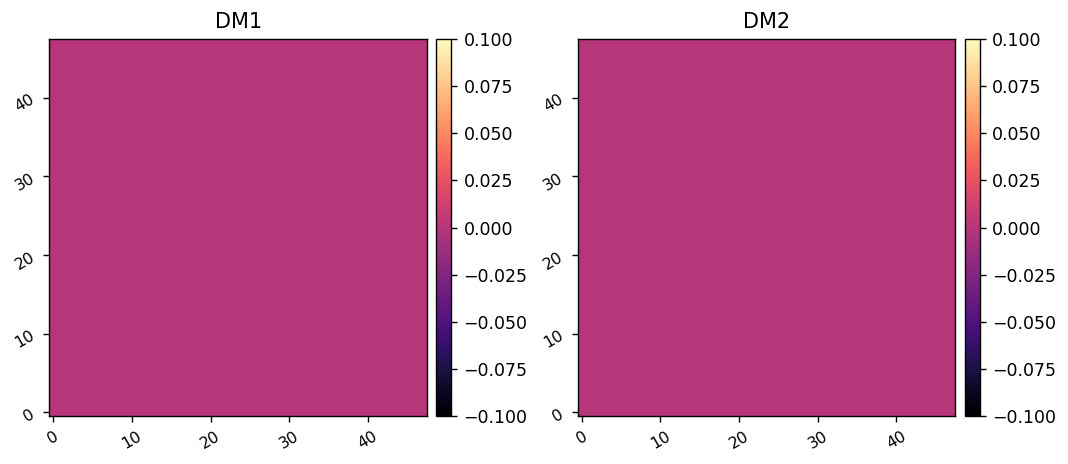

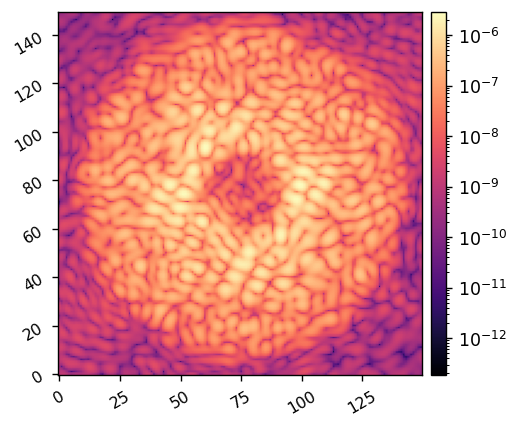

In [2]:
reload(cgi)
sys = cgi.CGI(cgi_mode='spc-wide', npsf=150,
              use_fpm=True,
              use_pupil_defocus=True, 
              polaxis=0,
              use_opds=True,
#               dm1_ref=dm1_flat, dm2_ref=dm2_flat,
             )
sys.show_dms()

npsf = sys.npsf
Nact = sys.Nact

ref_psf = sys.snap()

misc.myimshow(ref_psf, lognorm=True)

In [3]:
nlam = 3
bw = 0.05
wavelengths = np.linspace(sys.wavelength_c*(1-bw/2), sys.wavelength_c*(1+bw/2), nlam)
wavelengths

<Quantity [8.04375e-07, 8.25000e-07, 8.45625e-07] m>

# Create the dark-hole mask

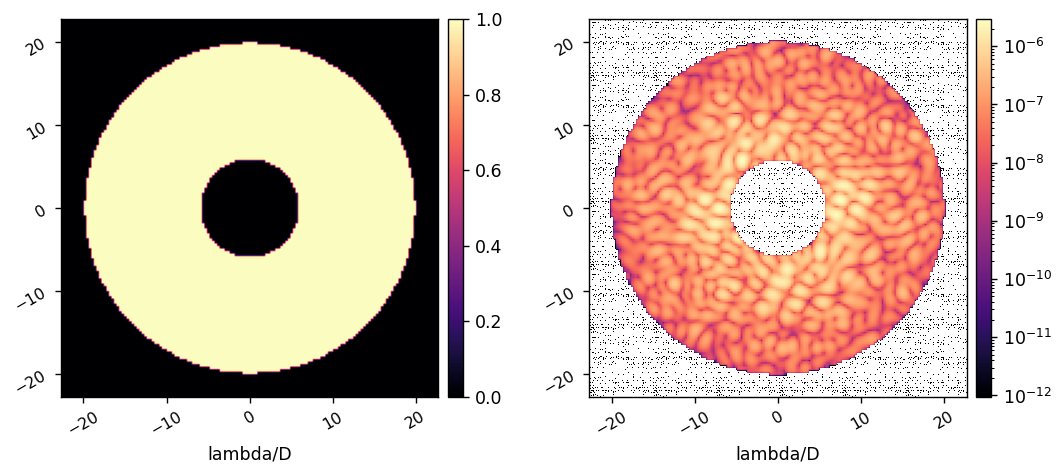

12328

In [4]:
xfp = np.linspace(-0.5, 0.5, npsf) * npsf * sys.psf_pixelscale_lamD
xf,yf = np.meshgrid(xfp,xfp)

edge = 2
iwa = 5.9
owa = 20
rot = 0

# Create the mask that is used to select which region to make dark.
dh_params = {
    'inner_radius' : iwa,
    'outer_radius' : owa,
    'edge_position' : edge,
#     'direction' : '+x',
    'rotation':rot,
    'full':True
}
dh_mask = utils.create_annular_focal_plane_mask(xf, yf, dh_params)

nmask = dh_mask.sum()

misc.myimshow2(dh_mask, ref_psf*dh_mask,  
               pxscl1=sys.psf_pixelscale_lamD, pxscl2=sys.psf_pixelscale_lamD,
               lognorm2=True)
nmask

In [5]:
reload(efc)

epsilon = 1e-9 # poke amplitudes (DM surface)
jac = efc.build_jacobian(sys, wavelengths, epsilon, dh_mask.flatten(), display=False)

Building Jacobian.
Calculating sensitivity for wavelength 8.044e-07 m
	Calculated response for mode 1/2304. Elapsed time=0.004 sec.
	Calculated response for mode 2/2304. Elapsed time=0.004 sec.
	Calculated response for mode 3/2304. Elapsed time=0.004 sec.
	Calculated response for mode 4/2304. Elapsed time=0.004 sec.
	Calculated response for mode 5/2304. Elapsed time=0.004 sec.
	Calculated response for mode 6/2304. Elapsed time=0.004 sec.
	Calculated response for mode 7/2304. Elapsed time=0.005 sec.
	Calculated response for mode 8/2304. Elapsed time=0.005 sec.
	Calculated response for mode 9/2304. Elapsed time=0.005 sec.
	Calculated response for mode 10/2304. Elapsed time=0.005 sec.
	Calculated response for mode 11/2304. Elapsed time=0.005 sec.
	Calculated response for mode 12/2304. Elapsed time=0.006 sec.
	Calculated response for mode 13/2304. Elapsed time=0.006 sec.
	Calculated response for mode 14/2304. Elapsed time=0.006 sec.
	Calculated response for mode 15/2304. Elapsed time=0.006

	Calculated response for mode 129/2304. Elapsed time=59.398 sec.
	Calculated response for mode 130/2304. Elapsed time=60.847 sec.
	Calculated response for mode 131/2304. Elapsed time=60.847 sec.
	Calculated response for mode 132/2304. Elapsed time=60.848 sec.
	Calculated response for mode 133/2304. Elapsed time=60.848 sec.
	Calculated response for mode 134/2304. Elapsed time=60.848 sec.
	Calculated response for mode 135/2304. Elapsed time=60.848 sec.
	Calculated response for mode 136/2304. Elapsed time=60.848 sec.
	Calculated response for mode 137/2304. Elapsed time=60.849 sec.
	Calculated response for mode 138/2304. Elapsed time=60.849 sec.
	Calculated response for mode 139/2304. Elapsed time=60.849 sec.
	Calculated response for mode 140/2304. Elapsed time=60.849 sec.
	Calculated response for mode 141/2304. Elapsed time=60.849 sec.
	Calculated response for mode 142/2304. Elapsed time=60.850 sec.
	Calculated response for mode 143/2304. Elapsed time=60.850 sec.
	Calculated response for 

	Calculated response for mode 255/2304. Elapsed time=144.691 sec.
	Calculated response for mode 256/2304. Elapsed time=146.134 sec.
	Calculated response for mode 257/2304. Elapsed time=147.580 sec.
	Calculated response for mode 258/2304. Elapsed time=149.022 sec.
	Calculated response for mode 259/2304. Elapsed time=150.471 sec.
	Calculated response for mode 260/2304. Elapsed time=151.921 sec.
	Calculated response for mode 261/2304. Elapsed time=153.367 sec.
	Calculated response for mode 262/2304. Elapsed time=154.815 sec.
	Calculated response for mode 263/2304. Elapsed time=156.330 sec.
	Calculated response for mode 264/2304. Elapsed time=157.773 sec.
	Calculated response for mode 265/2304. Elapsed time=159.215 sec.
	Calculated response for mode 266/2304. Elapsed time=160.661 sec.
	Calculated response for mode 267/2304. Elapsed time=162.105 sec.
	Calculated response for mode 268/2304. Elapsed time=163.550 sec.
	Calculated response for mode 269/2304. Elapsed time=164.992 sec.
	Calculate

	Calculated response for mode 391/2304. Elapsed time=276.290 sec.
	Calculated response for mode 392/2304. Elapsed time=277.731 sec.
	Calculated response for mode 393/2304. Elapsed time=279.171 sec.
	Calculated response for mode 394/2304. Elapsed time=280.614 sec.
	Calculated response for mode 395/2304. Elapsed time=282.054 sec.
	Calculated response for mode 396/2304. Elapsed time=283.494 sec.
	Calculated response for mode 397/2304. Elapsed time=284.937 sec.
	Calculated response for mode 398/2304. Elapsed time=286.380 sec.
	Calculated response for mode 399/2304. Elapsed time=287.821 sec.
	Calculated response for mode 400/2304. Elapsed time=289.260 sec.
	Calculated response for mode 401/2304. Elapsed time=290.700 sec.
	Calculated response for mode 402/2304. Elapsed time=292.141 sec.
	Calculated response for mode 403/2304. Elapsed time=293.581 sec.
	Calculated response for mode 404/2304. Elapsed time=295.023 sec.
	Calculated response for mode 405/2304. Elapsed time=296.467 sec.
	Calculate

	Calculated response for mode 516/2304. Elapsed time=428.065 sec.
	Calculated response for mode 517/2304. Elapsed time=429.508 sec.
	Calculated response for mode 518/2304. Elapsed time=430.952 sec.
	Calculated response for mode 519/2304. Elapsed time=432.391 sec.
	Calculated response for mode 520/2304. Elapsed time=433.836 sec.
	Calculated response for mode 521/2304. Elapsed time=435.281 sec.
	Calculated response for mode 522/2304. Elapsed time=436.722 sec.
	Calculated response for mode 523/2304. Elapsed time=438.164 sec.
	Calculated response for mode 524/2304. Elapsed time=439.605 sec.
	Calculated response for mode 525/2304. Elapsed time=439.605 sec.
	Calculated response for mode 526/2304. Elapsed time=439.605 sec.
	Calculated response for mode 527/2304. Elapsed time=439.606 sec.
	Calculated response for mode 528/2304. Elapsed time=439.606 sec.
	Calculated response for mode 529/2304. Elapsed time=439.606 sec.
	Calculated response for mode 530/2304. Elapsed time=439.606 sec.
	Calculate

	Calculated response for mode 641/2304. Elapsed time=578.398 sec.
	Calculated response for mode 642/2304. Elapsed time=579.840 sec.
	Calculated response for mode 643/2304. Elapsed time=581.280 sec.
	Calculated response for mode 644/2304. Elapsed time=582.722 sec.
	Calculated response for mode 645/2304. Elapsed time=584.164 sec.
	Calculated response for mode 646/2304. Elapsed time=585.605 sec.
	Calculated response for mode 647/2304. Elapsed time=587.046 sec.
	Calculated response for mode 648/2304. Elapsed time=588.486 sec.
	Calculated response for mode 649/2304. Elapsed time=589.926 sec.
	Calculated response for mode 650/2304. Elapsed time=591.368 sec.
	Calculated response for mode 651/2304. Elapsed time=592.812 sec.
	Calculated response for mode 652/2304. Elapsed time=594.256 sec.
	Calculated response for mode 653/2304. Elapsed time=595.700 sec.
	Calculated response for mode 654/2304. Elapsed time=597.142 sec.
	Calculated response for mode 655/2304. Elapsed time=598.583 sec.
	Calculate

	Calculated response for mode 766/2304. Elapsed time=745.954 sec.
	Calculated response for mode 767/2304. Elapsed time=745.954 sec.
	Calculated response for mode 768/2304. Elapsed time=745.954 sec.
	Calculated response for mode 769/2304. Elapsed time=745.955 sec.
	Calculated response for mode 770/2304. Elapsed time=747.396 sec.
	Calculated response for mode 771/2304. Elapsed time=748.837 sec.
	Calculated response for mode 772/2304. Elapsed time=750.277 sec.
	Calculated response for mode 773/2304. Elapsed time=751.721 sec.
	Calculated response for mode 774/2304. Elapsed time=753.162 sec.
	Calculated response for mode 775/2304. Elapsed time=754.605 sec.
	Calculated response for mode 776/2304. Elapsed time=756.044 sec.
	Calculated response for mode 777/2304. Elapsed time=757.488 sec.
	Calculated response for mode 778/2304. Elapsed time=758.927 sec.
	Calculated response for mode 779/2304. Elapsed time=760.444 sec.
	Calculated response for mode 780/2304. Elapsed time=761.885 sec.
	Calculate

	Calculated response for mode 891/2304. Elapsed time=916.455 sec.
	Calculated response for mode 892/2304. Elapsed time=917.896 sec.
	Calculated response for mode 893/2304. Elapsed time=919.338 sec.
	Calculated response for mode 894/2304. Elapsed time=920.779 sec.
	Calculated response for mode 895/2304. Elapsed time=922.219 sec.
	Calculated response for mode 896/2304. Elapsed time=923.660 sec.
	Calculated response for mode 897/2304. Elapsed time=925.103 sec.
	Calculated response for mode 898/2304. Elapsed time=926.547 sec.
	Calculated response for mode 899/2304. Elapsed time=927.987 sec.
	Calculated response for mode 900/2304. Elapsed time=929.429 sec.
	Calculated response for mode 901/2304. Elapsed time=930.871 sec.
	Calculated response for mode 902/2304. Elapsed time=932.312 sec.
	Calculated response for mode 903/2304. Elapsed time=933.754 sec.
	Calculated response for mode 904/2304. Elapsed time=935.197 sec.
	Calculated response for mode 905/2304. Elapsed time=936.640 sec.
	Calculate

	Calculated response for mode 1014/2304. Elapsed time=1087.045 sec.
	Calculated response for mode 1015/2304. Elapsed time=1088.487 sec.
	Calculated response for mode 1016/2304. Elapsed time=1089.929 sec.
	Calculated response for mode 1017/2304. Elapsed time=1091.372 sec.
	Calculated response for mode 1018/2304. Elapsed time=1092.816 sec.
	Calculated response for mode 1019/2304. Elapsed time=1094.258 sec.
	Calculated response for mode 1020/2304. Elapsed time=1095.702 sec.
	Calculated response for mode 1021/2304. Elapsed time=1097.144 sec.
	Calculated response for mode 1022/2304. Elapsed time=1098.587 sec.
	Calculated response for mode 1023/2304. Elapsed time=1100.105 sec.
	Calculated response for mode 1024/2304. Elapsed time=1101.547 sec.
	Calculated response for mode 1025/2304. Elapsed time=1102.990 sec.
	Calculated response for mode 1026/2304. Elapsed time=1104.432 sec.
	Calculated response for mode 1027/2304. Elapsed time=1105.874 sec.
	Calculated response for mode 1028/2304. Elapsed

	Calculated response for mode 1135/2304. Elapsed time=1261.964 sec.
	Calculated response for mode 1136/2304. Elapsed time=1263.405 sec.
	Calculated response for mode 1137/2304. Elapsed time=1264.852 sec.
	Calculated response for mode 1138/2304. Elapsed time=1266.299 sec.
	Calculated response for mode 1139/2304. Elapsed time=1267.739 sec.
	Calculated response for mode 1140/2304. Elapsed time=1269.182 sec.
	Calculated response for mode 1141/2304. Elapsed time=1270.627 sec.
	Calculated response for mode 1142/2304. Elapsed time=1272.069 sec.
	Calculated response for mode 1143/2304. Elapsed time=1273.510 sec.
	Calculated response for mode 1144/2304. Elapsed time=1274.955 sec.
	Calculated response for mode 1145/2304. Elapsed time=1276.398 sec.
	Calculated response for mode 1146/2304. Elapsed time=1277.841 sec.
	Calculated response for mode 1147/2304. Elapsed time=1279.287 sec.
	Calculated response for mode 1148/2304. Elapsed time=1280.731 sec.
	Calculated response for mode 1149/2304. Elapsed

	Calculated response for mode 1256/2304. Elapsed time=1436.973 sec.
	Calculated response for mode 1257/2304. Elapsed time=1438.489 sec.
	Calculated response for mode 1258/2304. Elapsed time=1439.932 sec.
	Calculated response for mode 1259/2304. Elapsed time=1441.377 sec.
	Calculated response for mode 1260/2304. Elapsed time=1442.819 sec.
	Calculated response for mode 1261/2304. Elapsed time=1444.266 sec.
	Calculated response for mode 1262/2304. Elapsed time=1445.713 sec.
	Calculated response for mode 1263/2304. Elapsed time=1447.155 sec.
	Calculated response for mode 1264/2304. Elapsed time=1448.598 sec.
	Calculated response for mode 1265/2304. Elapsed time=1450.045 sec.
	Calculated response for mode 1266/2304. Elapsed time=1451.492 sec.
	Calculated response for mode 1267/2304. Elapsed time=1452.937 sec.
	Calculated response for mode 1268/2304. Elapsed time=1454.379 sec.
	Calculated response for mode 1269/2304. Elapsed time=1455.825 sec.
	Calculated response for mode 1270/2304. Elapsed

	Calculated response for mode 1377/2304. Elapsed time=1607.891 sec.
	Calculated response for mode 1378/2304. Elapsed time=1609.335 sec.
	Calculated response for mode 1379/2304. Elapsed time=1610.777 sec.
	Calculated response for mode 1380/2304. Elapsed time=1612.221 sec.
	Calculated response for mode 1381/2304. Elapsed time=1613.665 sec.
	Calculated response for mode 1382/2304. Elapsed time=1615.106 sec.
	Calculated response for mode 1383/2304. Elapsed time=1616.550 sec.
	Calculated response for mode 1384/2304. Elapsed time=1617.992 sec.
	Calculated response for mode 1385/2304. Elapsed time=1619.434 sec.
	Calculated response for mode 1386/2304. Elapsed time=1620.882 sec.
	Calculated response for mode 1387/2304. Elapsed time=1622.326 sec.
	Calculated response for mode 1388/2304. Elapsed time=1623.794 sec.
	Calculated response for mode 1389/2304. Elapsed time=1626.077 sec.
	Calculated response for mode 1390/2304. Elapsed time=1627.523 sec.
	Calculated response for mode 1391/2304. Elapsed

	Calculated response for mode 1498/2304. Elapsed time=1775.938 sec.
	Calculated response for mode 1499/2304. Elapsed time=1777.381 sec.
	Calculated response for mode 1500/2304. Elapsed time=1778.822 sec.
	Calculated response for mode 1501/2304. Elapsed time=1780.262 sec.
	Calculated response for mode 1502/2304. Elapsed time=1781.706 sec.
	Calculated response for mode 1503/2304. Elapsed time=1783.223 sec.
	Calculated response for mode 1504/2304. Elapsed time=1784.663 sec.
	Calculated response for mode 1505/2304. Elapsed time=1786.103 sec.
	Calculated response for mode 1506/2304. Elapsed time=1787.544 sec.
	Calculated response for mode 1507/2304. Elapsed time=1788.983 sec.
	Calculated response for mode 1508/2304. Elapsed time=1790.425 sec.
	Calculated response for mode 1509/2304. Elapsed time=1791.868 sec.
	Calculated response for mode 1510/2304. Elapsed time=1793.306 sec.
	Calculated response for mode 1511/2304. Elapsed time=1794.746 sec.
	Calculated response for mode 1512/2304. Elapsed

	Calculated response for mode 1619/2304. Elapsed time=1940.854 sec.
	Calculated response for mode 1620/2304. Elapsed time=1942.299 sec.
	Calculated response for mode 1621/2304. Elapsed time=1943.740 sec.
	Calculated response for mode 1622/2304. Elapsed time=1945.182 sec.
	Calculated response for mode 1623/2304. Elapsed time=1946.624 sec.
	Calculated response for mode 1624/2304. Elapsed time=1948.066 sec.
	Calculated response for mode 1625/2304. Elapsed time=1949.508 sec.
	Calculated response for mode 1626/2304. Elapsed time=1950.950 sec.
	Calculated response for mode 1627/2304. Elapsed time=1952.392 sec.
	Calculated response for mode 1628/2304. Elapsed time=1953.834 sec.
	Calculated response for mode 1629/2304. Elapsed time=1955.277 sec.
	Calculated response for mode 1630/2304. Elapsed time=1956.721 sec.
	Calculated response for mode 1631/2304. Elapsed time=1956.722 sec.
	Calculated response for mode 1632/2304. Elapsed time=1956.722 sec.
	Calculated response for mode 1633/2304. Elapsed

	Calculated response for mode 1740/2304. Elapsed time=2089.809 sec.
	Calculated response for mode 1741/2304. Elapsed time=2091.244 sec.
	Calculated response for mode 1742/2304. Elapsed time=2092.682 sec.
	Calculated response for mode 1743/2304. Elapsed time=2094.121 sec.
	Calculated response for mode 1744/2304. Elapsed time=2095.558 sec.
	Calculated response for mode 1745/2304. Elapsed time=2096.997 sec.
	Calculated response for mode 1746/2304. Elapsed time=2098.433 sec.
	Calculated response for mode 1747/2304. Elapsed time=2099.872 sec.
	Calculated response for mode 1748/2304. Elapsed time=2101.312 sec.
	Calculated response for mode 1749/2304. Elapsed time=2102.752 sec.
	Calculated response for mode 1750/2304. Elapsed time=2104.190 sec.
	Calculated response for mode 1751/2304. Elapsed time=2105.629 sec.
	Calculated response for mode 1752/2304. Elapsed time=2107.073 sec.
	Calculated response for mode 1753/2304. Elapsed time=2108.514 sec.
	Calculated response for mode 1754/2304. Elapsed

	Calculated response for mode 1861/2304. Elapsed time=2240.045 sec.
	Calculated response for mode 1862/2304. Elapsed time=2241.486 sec.
	Calculated response for mode 1863/2304. Elapsed time=2242.927 sec.
	Calculated response for mode 1864/2304. Elapsed time=2244.367 sec.
	Calculated response for mode 1865/2304. Elapsed time=2245.808 sec.
	Calculated response for mode 1866/2304. Elapsed time=2247.249 sec.
	Calculated response for mode 1867/2304. Elapsed time=2248.689 sec.
	Calculated response for mode 1868/2304. Elapsed time=2248.690 sec.
	Calculated response for mode 1869/2304. Elapsed time=2248.690 sec.
	Calculated response for mode 1870/2304. Elapsed time=2248.690 sec.
	Calculated response for mode 1871/2304. Elapsed time=2248.691 sec.
	Calculated response for mode 1872/2304. Elapsed time=2248.691 sec.
	Calculated response for mode 1873/2304. Elapsed time=2248.691 sec.
	Calculated response for mode 1874/2304. Elapsed time=2248.691 sec.
	Calculated response for mode 1875/2304. Elapsed

	Calculated response for mode 1982/2304. Elapsed time=2358.488 sec.
	Calculated response for mode 1983/2304. Elapsed time=2359.952 sec.
	Calculated response for mode 1984/2304. Elapsed time=2361.395 sec.
	Calculated response for mode 1985/2304. Elapsed time=2362.837 sec.
	Calculated response for mode 1986/2304. Elapsed time=2364.281 sec.
	Calculated response for mode 1987/2304. Elapsed time=2365.723 sec.
	Calculated response for mode 1988/2304. Elapsed time=2367.166 sec.
	Calculated response for mode 1989/2304. Elapsed time=2368.609 sec.
	Calculated response for mode 1990/2304. Elapsed time=2370.053 sec.
	Calculated response for mode 1991/2304. Elapsed time=2371.497 sec.
	Calculated response for mode 1992/2304. Elapsed time=2372.939 sec.
	Calculated response for mode 1993/2304. Elapsed time=2374.386 sec.
	Calculated response for mode 1994/2304. Elapsed time=2375.825 sec.
	Calculated response for mode 1995/2304. Elapsed time=2377.268 sec.
	Calculated response for mode 1996/2304. Elapsed

	Calculated response for mode 2125/2304. Elapsed time=2481.360 sec.
	Calculated response for mode 2126/2304. Elapsed time=2482.801 sec.
	Calculated response for mode 2127/2304. Elapsed time=2484.241 sec.
	Calculated response for mode 2128/2304. Elapsed time=2485.682 sec.
	Calculated response for mode 2129/2304. Elapsed time=2487.122 sec.
	Calculated response for mode 2130/2304. Elapsed time=2488.563 sec.
	Calculated response for mode 2131/2304. Elapsed time=2490.002 sec.
	Calculated response for mode 2132/2304. Elapsed time=2491.443 sec.
	Calculated response for mode 2133/2304. Elapsed time=2492.884 sec.
	Calculated response for mode 2134/2304. Elapsed time=2494.329 sec.
	Calculated response for mode 2135/2304. Elapsed time=2495.772 sec.
	Calculated response for mode 2136/2304. Elapsed time=2497.214 sec.
	Calculated response for mode 2137/2304. Elapsed time=2498.672 sec.
	Calculated response for mode 2138/2304. Elapsed time=2500.112 sec.
	Calculated response for mode 2139/2304. Elapsed

	Calculated response for mode 2278/2304. Elapsed time=2568.053 sec.
	Calculated response for mode 2279/2304. Elapsed time=2569.495 sec.
	Calculated response for mode 2280/2304. Elapsed time=2570.940 sec.
	Calculated response for mode 2281/2304. Elapsed time=2572.385 sec.
	Calculated response for mode 2282/2304. Elapsed time=2573.832 sec.
	Calculated response for mode 2283/2304. Elapsed time=2575.276 sec.
	Calculated response for mode 2284/2304. Elapsed time=2575.276 sec.
	Calculated response for mode 2285/2304. Elapsed time=2575.276 sec.
	Calculated response for mode 2286/2304. Elapsed time=2575.277 sec.
	Calculated response for mode 2287/2304. Elapsed time=2575.277 sec.
	Calculated response for mode 2288/2304. Elapsed time=2575.277 sec.
	Calculated response for mode 2289/2304. Elapsed time=2575.277 sec.
	Calculated response for mode 2290/2304. Elapsed time=2575.278 sec.
	Calculated response for mode 2291/2304. Elapsed time=2575.278 sec.
	Calculated response for mode 2292/2304. Elapsed

	Calculated response for mode 111/2304. Elapsed time=2608.543 sec.
	Calculated response for mode 112/2304. Elapsed time=2609.988 sec.
	Calculated response for mode 113/2304. Elapsed time=2611.433 sec.
	Calculated response for mode 114/2304. Elapsed time=2612.877 sec.
	Calculated response for mode 115/2304. Elapsed time=2614.389 sec.
	Calculated response for mode 116/2304. Elapsed time=2615.832 sec.
	Calculated response for mode 117/2304. Elapsed time=2617.278 sec.
	Calculated response for mode 118/2304. Elapsed time=2618.720 sec.
	Calculated response for mode 119/2304. Elapsed time=2620.162 sec.
	Calculated response for mode 120/2304. Elapsed time=2621.606 sec.
	Calculated response for mode 121/2304. Elapsed time=2623.047 sec.
	Calculated response for mode 122/2304. Elapsed time=2624.493 sec.
	Calculated response for mode 123/2304. Elapsed time=2625.935 sec.
	Calculated response for mode 124/2304. Elapsed time=2627.375 sec.
	Calculated response for mode 125/2304. Elapsed time=2628.818 

	Calculated response for mode 250/2304. Elapsed time=2712.965 sec.
	Calculated response for mode 251/2304. Elapsed time=2714.408 sec.
	Calculated response for mode 252/2304. Elapsed time=2715.851 sec.
	Calculated response for mode 253/2304. Elapsed time=2717.295 sec.
	Calculated response for mode 254/2304. Elapsed time=2718.736 sec.
	Calculated response for mode 255/2304. Elapsed time=2720.176 sec.
	Calculated response for mode 256/2304. Elapsed time=2721.617 sec.
	Calculated response for mode 257/2304. Elapsed time=2723.058 sec.
	Calculated response for mode 258/2304. Elapsed time=2724.505 sec.
	Calculated response for mode 259/2304. Elapsed time=2725.945 sec.
	Calculated response for mode 260/2304. Elapsed time=2727.384 sec.
	Calculated response for mode 261/2304. Elapsed time=2728.898 sec.
	Calculated response for mode 262/2304. Elapsed time=2730.336 sec.
	Calculated response for mode 263/2304. Elapsed time=2731.777 sec.
	Calculated response for mode 264/2304. Elapsed time=2733.218 

	Calculated response for mode 373/2304. Elapsed time=2844.341 sec.
	Calculated response for mode 374/2304. Elapsed time=2845.782 sec.
	Calculated response for mode 375/2304. Elapsed time=2847.221 sec.
	Calculated response for mode 376/2304. Elapsed time=2848.662 sec.
	Calculated response for mode 377/2304. Elapsed time=2850.102 sec.
	Calculated response for mode 378/2304. Elapsed time=2850.102 sec.
	Calculated response for mode 379/2304. Elapsed time=2850.103 sec.
	Calculated response for mode 380/2304. Elapsed time=2850.103 sec.
	Calculated response for mode 381/2304. Elapsed time=2850.103 sec.
	Calculated response for mode 382/2304. Elapsed time=2850.103 sec.
	Calculated response for mode 383/2304. Elapsed time=2850.104 sec.
	Calculated response for mode 384/2304. Elapsed time=2850.104 sec.
	Calculated response for mode 385/2304. Elapsed time=2850.104 sec.
	Calculated response for mode 386/2304. Elapsed time=2850.104 sec.
	Calculated response for mode 387/2304. Elapsed time=2850.105 

	Calculated response for mode 496/2304. Elapsed time=2975.118 sec.
	Calculated response for mode 497/2304. Elapsed time=2976.559 sec.
	Calculated response for mode 498/2304. Elapsed time=2978.004 sec.
	Calculated response for mode 499/2304. Elapsed time=2979.446 sec.
	Calculated response for mode 500/2304. Elapsed time=2980.890 sec.
	Calculated response for mode 501/2304. Elapsed time=2982.330 sec.
	Calculated response for mode 502/2304. Elapsed time=2983.773 sec.
	Calculated response for mode 503/2304. Elapsed time=2985.215 sec.
	Calculated response for mode 504/2304. Elapsed time=2986.658 sec.
	Calculated response for mode 505/2304. Elapsed time=2988.101 sec.
	Calculated response for mode 506/2304. Elapsed time=2989.542 sec.
	Calculated response for mode 507/2304. Elapsed time=2990.983 sec.
	Calculated response for mode 508/2304. Elapsed time=2992.425 sec.
	Calculated response for mode 509/2304. Elapsed time=2993.865 sec.
	Calculated response for mode 510/2304. Elapsed time=2995.374 

	Calculated response for mode 619/2304. Elapsed time=3130.896 sec.
	Calculated response for mode 620/2304. Elapsed time=3132.334 sec.
	Calculated response for mode 621/2304. Elapsed time=3133.770 sec.
	Calculated response for mode 622/2304. Elapsed time=3133.771 sec.
	Calculated response for mode 623/2304. Elapsed time=3133.771 sec.
	Calculated response for mode 624/2304. Elapsed time=3133.771 sec.
	Calculated response for mode 625/2304. Elapsed time=3133.772 sec.
	Calculated response for mode 626/2304. Elapsed time=3133.772 sec.
	Calculated response for mode 627/2304. Elapsed time=3133.772 sec.
	Calculated response for mode 628/2304. Elapsed time=3135.210 sec.
	Calculated response for mode 629/2304. Elapsed time=3136.647 sec.
	Calculated response for mode 630/2304. Elapsed time=3138.085 sec.
	Calculated response for mode 631/2304. Elapsed time=3139.524 sec.
	Calculated response for mode 632/2304. Elapsed time=3140.960 sec.
	Calculated response for mode 633/2304. Elapsed time=3142.395 

	Calculated response for mode 742/2304. Elapsed time=3286.497 sec.
	Calculated response for mode 743/2304. Elapsed time=3287.939 sec.
	Calculated response for mode 744/2304. Elapsed time=3289.379 sec.
	Calculated response for mode 745/2304. Elapsed time=3290.815 sec.
	Calculated response for mode 746/2304. Elapsed time=3292.251 sec.
	Calculated response for mode 747/2304. Elapsed time=3293.687 sec.
	Calculated response for mode 748/2304. Elapsed time=3295.124 sec.
	Calculated response for mode 749/2304. Elapsed time=3296.634 sec.
	Calculated response for mode 750/2304. Elapsed time=3298.072 sec.
	Calculated response for mode 751/2304. Elapsed time=3299.510 sec.
	Calculated response for mode 752/2304. Elapsed time=3300.949 sec.
	Calculated response for mode 753/2304. Elapsed time=3302.385 sec.
	Calculated response for mode 754/2304. Elapsed time=3303.822 sec.
	Calculated response for mode 755/2304. Elapsed time=3305.258 sec.
	Calculated response for mode 756/2304. Elapsed time=3306.695 

	Calculated response for mode 866/2304. Elapsed time=3455.148 sec.
	Calculated response for mode 867/2304. Elapsed time=3456.587 sec.
	Calculated response for mode 868/2304. Elapsed time=3458.024 sec.
	Calculated response for mode 869/2304. Elapsed time=3459.461 sec.
	Calculated response for mode 870/2304. Elapsed time=3460.902 sec.
	Calculated response for mode 871/2304. Elapsed time=3462.341 sec.
	Calculated response for mode 872/2304. Elapsed time=3463.781 sec.
	Calculated response for mode 873/2304. Elapsed time=3465.221 sec.
	Calculated response for mode 874/2304. Elapsed time=3466.661 sec.
	Calculated response for mode 875/2304. Elapsed time=3468.099 sec.
	Calculated response for mode 876/2304. Elapsed time=3469.537 sec.
	Calculated response for mode 877/2304. Elapsed time=3470.974 sec.
	Calculated response for mode 878/2304. Elapsed time=3472.413 sec.
	Calculated response for mode 879/2304. Elapsed time=3473.854 sec.
	Calculated response for mode 880/2304. Elapsed time=3475.292 

	Calculated response for mode 989/2304. Elapsed time=3626.597 sec.
	Calculated response for mode 990/2304. Elapsed time=3628.036 sec.
	Calculated response for mode 991/2304. Elapsed time=3629.474 sec.
	Calculated response for mode 992/2304. Elapsed time=3630.913 sec.
	Calculated response for mode 993/2304. Elapsed time=3632.348 sec.
	Calculated response for mode 994/2304. Elapsed time=3633.862 sec.
	Calculated response for mode 995/2304. Elapsed time=3635.298 sec.
	Calculated response for mode 996/2304. Elapsed time=3636.735 sec.
	Calculated response for mode 997/2304. Elapsed time=3638.173 sec.
	Calculated response for mode 998/2304. Elapsed time=3639.609 sec.
	Calculated response for mode 999/2304. Elapsed time=3641.046 sec.
	Calculated response for mode 1000/2304. Elapsed time=3642.482 sec.
	Calculated response for mode 1001/2304. Elapsed time=3643.920 sec.
	Calculated response for mode 1002/2304. Elapsed time=3645.359 sec.
	Calculated response for mode 1003/2304. Elapsed time=3646.

	Calculated response for mode 1110/2304. Elapsed time=3799.525 sec.
	Calculated response for mode 1111/2304. Elapsed time=3800.962 sec.
	Calculated response for mode 1112/2304. Elapsed time=3802.400 sec.
	Calculated response for mode 1113/2304. Elapsed time=3803.837 sec.
	Calculated response for mode 1114/2304. Elapsed time=3805.275 sec.
	Calculated response for mode 1115/2304. Elapsed time=3806.712 sec.
	Calculated response for mode 1116/2304. Elapsed time=3808.150 sec.
	Calculated response for mode 1117/2304. Elapsed time=3809.589 sec.
	Calculated response for mode 1118/2304. Elapsed time=3811.025 sec.
	Calculated response for mode 1119/2304. Elapsed time=3812.464 sec.
	Calculated response for mode 1120/2304. Elapsed time=3813.903 sec.
	Calculated response for mode 1121/2304. Elapsed time=3815.340 sec.
	Calculated response for mode 1122/2304. Elapsed time=3816.780 sec.
	Calculated response for mode 1123/2304. Elapsed time=3818.218 sec.
	Calculated response for mode 1124/2304. Elapsed

	Calculated response for mode 1231/2304. Elapsed time=3973.921 sec.
	Calculated response for mode 1232/2304. Elapsed time=3975.358 sec.
	Calculated response for mode 1233/2304. Elapsed time=3976.796 sec.
	Calculated response for mode 1234/2304. Elapsed time=3978.234 sec.
	Calculated response for mode 1235/2304. Elapsed time=3979.670 sec.
	Calculated response for mode 1236/2304. Elapsed time=3981.104 sec.
	Calculated response for mode 1237/2304. Elapsed time=3982.539 sec.
	Calculated response for mode 1238/2304. Elapsed time=3983.975 sec.
	Calculated response for mode 1239/2304. Elapsed time=3985.411 sec.
	Calculated response for mode 1240/2304. Elapsed time=3986.848 sec.
	Calculated response for mode 1241/2304. Elapsed time=3988.284 sec.
	Calculated response for mode 1242/2304. Elapsed time=3989.723 sec.
	Calculated response for mode 1243/2304. Elapsed time=3991.163 sec.
	Calculated response for mode 1244/2304. Elapsed time=3992.602 sec.
	Calculated response for mode 1245/2304. Elapsed

	Calculated response for mode 1352/2304. Elapsed time=4144.267 sec.
	Calculated response for mode 1353/2304. Elapsed time=4145.709 sec.
	Calculated response for mode 1354/2304. Elapsed time=4147.149 sec.
	Calculated response for mode 1355/2304. Elapsed time=4148.589 sec.
	Calculated response for mode 1356/2304. Elapsed time=4150.031 sec.
	Calculated response for mode 1357/2304. Elapsed time=4151.469 sec.
	Calculated response for mode 1358/2304. Elapsed time=4152.912 sec.
	Calculated response for mode 1359/2304. Elapsed time=4154.356 sec.
	Calculated response for mode 1360/2304. Elapsed time=4155.798 sec.
	Calculated response for mode 1361/2304. Elapsed time=4157.301 sec.
	Calculated response for mode 1362/2304. Elapsed time=4158.742 sec.
	Calculated response for mode 1363/2304. Elapsed time=4160.182 sec.
	Calculated response for mode 1364/2304. Elapsed time=4161.622 sec.
	Calculated response for mode 1365/2304. Elapsed time=4163.064 sec.
	Calculated response for mode 1366/2304. Elapsed

	Calculated response for mode 1473/2304. Elapsed time=4313.210 sec.
	Calculated response for mode 1474/2304. Elapsed time=4314.640 sec.
	Calculated response for mode 1475/2304. Elapsed time=4316.072 sec.
	Calculated response for mode 1476/2304. Elapsed time=4317.510 sec.
	Calculated response for mode 1477/2304. Elapsed time=4318.942 sec.
	Calculated response for mode 1478/2304. Elapsed time=4320.385 sec.
	Calculated response for mode 1479/2304. Elapsed time=4321.820 sec.
	Calculated response for mode 1480/2304. Elapsed time=4323.257 sec.
	Calculated response for mode 1481/2304. Elapsed time=4324.696 sec.
	Calculated response for mode 1482/2304. Elapsed time=4326.133 sec.
	Calculated response for mode 1483/2304. Elapsed time=4327.571 sec.
	Calculated response for mode 1484/2304. Elapsed time=4329.011 sec.
	Calculated response for mode 1485/2304. Elapsed time=4330.440 sec.
	Calculated response for mode 1486/2304. Elapsed time=4331.879 sec.
	Calculated response for mode 1487/2304. Elapsed

	Calculated response for mode 1594/2304. Elapsed time=4474.574 sec.
	Calculated response for mode 1595/2304. Elapsed time=4476.014 sec.
	Calculated response for mode 1596/2304. Elapsed time=4477.454 sec.
	Calculated response for mode 1597/2304. Elapsed time=4478.895 sec.
	Calculated response for mode 1598/2304. Elapsed time=4480.337 sec.
	Calculated response for mode 1599/2304. Elapsed time=4481.779 sec.
	Calculated response for mode 1600/2304. Elapsed time=4483.220 sec.
	Calculated response for mode 1601/2304. Elapsed time=4484.659 sec.
	Calculated response for mode 1602/2304. Elapsed time=4486.105 sec.
	Calculated response for mode 1603/2304. Elapsed time=4487.550 sec.
	Calculated response for mode 1604/2304. Elapsed time=4488.994 sec.
	Calculated response for mode 1605/2304. Elapsed time=4490.440 sec.
	Calculated response for mode 1606/2304. Elapsed time=4491.887 sec.
	Calculated response for mode 1607/2304. Elapsed time=4493.332 sec.
	Calculated response for mode 1608/2304. Elapsed

	Calculated response for mode 1715/2304. Elapsed time=4633.035 sec.
	Calculated response for mode 1716/2304. Elapsed time=4634.475 sec.
	Calculated response for mode 1717/2304. Elapsed time=4635.916 sec.
	Calculated response for mode 1718/2304. Elapsed time=4637.356 sec.
	Calculated response for mode 1719/2304. Elapsed time=4638.795 sec.
	Calculated response for mode 1720/2304. Elapsed time=4640.235 sec.
	Calculated response for mode 1721/2304. Elapsed time=4641.674 sec.
	Calculated response for mode 1722/2304. Elapsed time=4643.113 sec.
	Calculated response for mode 1723/2304. Elapsed time=4644.551 sec.
	Calculated response for mode 1724/2304. Elapsed time=4646.054 sec.
	Calculated response for mode 1725/2304. Elapsed time=4647.493 sec.
	Calculated response for mode 1726/2304. Elapsed time=4647.493 sec.
	Calculated response for mode 1727/2304. Elapsed time=4647.494 sec.
	Calculated response for mode 1728/2304. Elapsed time=4647.494 sec.
	Calculated response for mode 1729/2304. Elapsed

	Calculated response for mode 1836/2304. Elapsed time=4772.777 sec.
	Calculated response for mode 1837/2304. Elapsed time=4774.215 sec.
	Calculated response for mode 1838/2304. Elapsed time=4775.652 sec.
	Calculated response for mode 1839/2304. Elapsed time=4777.091 sec.
	Calculated response for mode 1840/2304. Elapsed time=4778.530 sec.
	Calculated response for mode 1841/2304. Elapsed time=4779.967 sec.
	Calculated response for mode 1842/2304. Elapsed time=4781.406 sec.
	Calculated response for mode 1843/2304. Elapsed time=4782.843 sec.
	Calculated response for mode 1844/2304. Elapsed time=4784.281 sec.
	Calculated response for mode 1845/2304. Elapsed time=4785.719 sec.
	Calculated response for mode 1846/2304. Elapsed time=4787.156 sec.
	Calculated response for mode 1847/2304. Elapsed time=4788.593 sec.
	Calculated response for mode 1848/2304. Elapsed time=4790.030 sec.
	Calculated response for mode 1849/2304. Elapsed time=4791.468 sec.
	Calculated response for mode 1850/2304. Elapsed

	Calculated response for mode 1957/2304. Elapsed time=4912.547 sec.
	Calculated response for mode 1958/2304. Elapsed time=4913.987 sec.
	Calculated response for mode 1959/2304. Elapsed time=4915.427 sec.
	Calculated response for mode 1960/2304. Elapsed time=4916.867 sec.
	Calculated response for mode 1961/2304. Elapsed time=4918.306 sec.
	Calculated response for mode 1962/2304. Elapsed time=4918.306 sec.
	Calculated response for mode 1963/2304. Elapsed time=4918.306 sec.
	Calculated response for mode 1964/2304. Elapsed time=4918.307 sec.
	Calculated response for mode 1965/2304. Elapsed time=4918.307 sec.
	Calculated response for mode 1966/2304. Elapsed time=4918.307 sec.
	Calculated response for mode 1967/2304. Elapsed time=4918.307 sec.
	Calculated response for mode 1968/2304. Elapsed time=4918.307 sec.
	Calculated response for mode 1969/2304. Elapsed time=4918.308 sec.
	Calculated response for mode 1970/2304. Elapsed time=4918.308 sec.
	Calculated response for mode 1971/2304. Elapsed

	Calculated response for mode 2078/2304. Elapsed time=5013.449 sec.
	Calculated response for mode 2079/2304. Elapsed time=5014.889 sec.
	Calculated response for mode 2080/2304. Elapsed time=5016.329 sec.
	Calculated response for mode 2081/2304. Elapsed time=5017.769 sec.
	Calculated response for mode 2082/2304. Elapsed time=5019.208 sec.
	Calculated response for mode 2083/2304. Elapsed time=5020.647 sec.
	Calculated response for mode 2084/2304. Elapsed time=5022.153 sec.
	Calculated response for mode 2085/2304. Elapsed time=5023.593 sec.
	Calculated response for mode 2086/2304. Elapsed time=5025.032 sec.
	Calculated response for mode 2087/2304. Elapsed time=5026.470 sec.
	Calculated response for mode 2088/2304. Elapsed time=5027.907 sec.
	Calculated response for mode 2089/2304. Elapsed time=5029.343 sec.
	Calculated response for mode 2090/2304. Elapsed time=5030.781 sec.
	Calculated response for mode 2091/2304. Elapsed time=5032.217 sec.
	Calculated response for mode 2092/2304. Elapsed

	Calculated response for mode 2225/2304. Elapsed time=5114.661 sec.
	Calculated response for mode 2226/2304. Elapsed time=5116.103 sec.
	Calculated response for mode 2227/2304. Elapsed time=5117.550 sec.
	Calculated response for mode 2228/2304. Elapsed time=5118.989 sec.
	Calculated response for mode 2229/2304. Elapsed time=5120.428 sec.
	Calculated response for mode 2230/2304. Elapsed time=5121.864 sec.
	Calculated response for mode 2231/2304. Elapsed time=5123.303 sec.
	Calculated response for mode 2232/2304. Elapsed time=5124.746 sec.
	Calculated response for mode 2233/2304. Elapsed time=5126.187 sec.
	Calculated response for mode 2234/2304. Elapsed time=5127.627 sec.
	Calculated response for mode 2235/2304. Elapsed time=5129.065 sec.
	Calculated response for mode 2236/2304. Elapsed time=5130.504 sec.
	Calculated response for mode 2237/2304. Elapsed time=5131.942 sec.
	Calculated response for mode 2238/2304. Elapsed time=5133.380 sec.
	Calculated response for mode 2239/2304. Elapsed

	Calculated response for mode 65/2304. Elapsed time=5155.041 sec.
	Calculated response for mode 66/2304. Elapsed time=5156.481 sec.
	Calculated response for mode 67/2304. Elapsed time=5157.918 sec.
	Calculated response for mode 68/2304. Elapsed time=5159.364 sec.
	Calculated response for mode 69/2304. Elapsed time=5160.806 sec.
	Calculated response for mode 70/2304. Elapsed time=5162.242 sec.
	Calculated response for mode 71/2304. Elapsed time=5163.681 sec.
	Calculated response for mode 72/2304. Elapsed time=5165.118 sec.
	Calculated response for mode 73/2304. Elapsed time=5166.557 sec.
	Calculated response for mode 74/2304. Elapsed time=5167.998 sec.
	Calculated response for mode 75/2304. Elapsed time=5169.436 sec.
	Calculated response for mode 76/2304. Elapsed time=5170.875 sec.
	Calculated response for mode 77/2304. Elapsed time=5172.312 sec.
	Calculated response for mode 78/2304. Elapsed time=5173.819 sec.
	Calculated response for mode 79/2304. Elapsed time=5175.256 sec.
	Calculate

	Calculated response for mode 203/2304. Elapsed time=5241.530 sec.
	Calculated response for mode 204/2304. Elapsed time=5242.969 sec.
	Calculated response for mode 205/2304. Elapsed time=5244.409 sec.
	Calculated response for mode 206/2304. Elapsed time=5245.849 sec.
	Calculated response for mode 207/2304. Elapsed time=5247.290 sec.
	Calculated response for mode 208/2304. Elapsed time=5248.796 sec.
	Calculated response for mode 209/2304. Elapsed time=5250.236 sec.
	Calculated response for mode 210/2304. Elapsed time=5251.675 sec.
	Calculated response for mode 211/2304. Elapsed time=5253.110 sec.
	Calculated response for mode 212/2304. Elapsed time=5254.548 sec.
	Calculated response for mode 213/2304. Elapsed time=5255.986 sec.
	Calculated response for mode 214/2304. Elapsed time=5257.424 sec.
	Calculated response for mode 215/2304. Elapsed time=5258.863 sec.
	Calculated response for mode 216/2304. Elapsed time=5260.303 sec.
	Calculated response for mode 217/2304. Elapsed time=5261.742 

	Calculated response for mode 326/2304. Elapsed time=5367.005 sec.
	Calculated response for mode 327/2304. Elapsed time=5368.441 sec.
	Calculated response for mode 328/2304. Elapsed time=5369.881 sec.
	Calculated response for mode 329/2304. Elapsed time=5369.882 sec.
	Calculated response for mode 330/2304. Elapsed time=5369.882 sec.
	Calculated response for mode 331/2304. Elapsed time=5369.882 sec.
	Calculated response for mode 332/2304. Elapsed time=5369.882 sec.
	Calculated response for mode 333/2304. Elapsed time=5369.883 sec.
	Calculated response for mode 334/2304. Elapsed time=5369.883 sec.
	Calculated response for mode 335/2304. Elapsed time=5369.883 sec.
	Calculated response for mode 336/2304. Elapsed time=5369.883 sec.
	Calculated response for mode 337/2304. Elapsed time=5369.883 sec.
	Calculated response for mode 338/2304. Elapsed time=5369.884 sec.
	Calculated response for mode 339/2304. Elapsed time=5369.884 sec.
	Calculated response for mode 340/2304. Elapsed time=5369.884 

	Calculated response for mode 449/2304. Elapsed time=5488.070 sec.
	Calculated response for mode 450/2304. Elapsed time=5489.509 sec.
	Calculated response for mode 451/2304. Elapsed time=5490.946 sec.
	Calculated response for mode 452/2304. Elapsed time=5492.383 sec.
	Calculated response for mode 453/2304. Elapsed time=5493.822 sec.
	Calculated response for mode 454/2304. Elapsed time=5495.260 sec.
	Calculated response for mode 455/2304. Elapsed time=5496.696 sec.
	Calculated response for mode 456/2304. Elapsed time=5498.135 sec.
	Calculated response for mode 457/2304. Elapsed time=5499.641 sec.
	Calculated response for mode 458/2304. Elapsed time=5501.079 sec.
	Calculated response for mode 459/2304. Elapsed time=5502.516 sec.
	Calculated response for mode 460/2304. Elapsed time=5503.953 sec.
	Calculated response for mode 461/2304. Elapsed time=5505.391 sec.
	Calculated response for mode 462/2304. Elapsed time=5506.830 sec.
	Calculated response for mode 463/2304. Elapsed time=5508.268 

	Calculated response for mode 572/2304. Elapsed time=5641.071 sec.
	Calculated response for mode 573/2304. Elapsed time=5641.072 sec.
	Calculated response for mode 574/2304. Elapsed time=5641.072 sec.
	Calculated response for mode 575/2304. Elapsed time=5641.072 sec.
	Calculated response for mode 576/2304. Elapsed time=5641.073 sec.
	Calculated response for mode 577/2304. Elapsed time=5641.073 sec.
	Calculated response for mode 578/2304. Elapsed time=5641.073 sec.
	Calculated response for mode 579/2304. Elapsed time=5641.073 sec.
	Calculated response for mode 580/2304. Elapsed time=5642.508 sec.
	Calculated response for mode 581/2304. Elapsed time=5643.945 sec.
	Calculated response for mode 582/2304. Elapsed time=5645.382 sec.
	Calculated response for mode 583/2304. Elapsed time=5646.823 sec.
	Calculated response for mode 584/2304. Elapsed time=5648.262 sec.
	Calculated response for mode 585/2304. Elapsed time=5649.700 sec.
	Calculated response for mode 586/2304. Elapsed time=5651.136 

	Calculated response for mode 695/2304. Elapsed time=5792.417 sec.
	Calculated response for mode 696/2304. Elapsed time=5793.856 sec.
	Calculated response for mode 697/2304. Elapsed time=5795.293 sec.
	Calculated response for mode 698/2304. Elapsed time=5796.731 sec.
	Calculated response for mode 699/2304. Elapsed time=5798.168 sec.
	Calculated response for mode 700/2304. Elapsed time=5799.606 sec.
	Calculated response for mode 701/2304. Elapsed time=5801.045 sec.
	Calculated response for mode 702/2304. Elapsed time=5802.483 sec.
	Calculated response for mode 703/2304. Elapsed time=5803.920 sec.
	Calculated response for mode 704/2304. Elapsed time=5805.360 sec.
	Calculated response for mode 705/2304. Elapsed time=5806.805 sec.
	Calculated response for mode 706/2304. Elapsed time=5808.247 sec.
	Calculated response for mode 707/2304. Elapsed time=5809.858 sec.
	Calculated response for mode 708/2304. Elapsed time=5811.366 sec.
	Calculated response for mode 709/2304. Elapsed time=5812.805 

	Calculated response for mode 818/2304. Elapsed time=5956.856 sec.
	Calculated response for mode 819/2304. Elapsed time=5958.297 sec.
	Calculated response for mode 820/2304. Elapsed time=5959.815 sec.
	Calculated response for mode 821/2304. Elapsed time=5961.255 sec.
	Calculated response for mode 822/2304. Elapsed time=5962.696 sec.
	Calculated response for mode 823/2304. Elapsed time=5964.134 sec.
	Calculated response for mode 824/2304. Elapsed time=5965.570 sec.
	Calculated response for mode 825/2304. Elapsed time=5967.008 sec.
	Calculated response for mode 826/2304. Elapsed time=5968.447 sec.
	Calculated response for mode 827/2304. Elapsed time=5969.886 sec.
	Calculated response for mode 828/2304. Elapsed time=5971.324 sec.
	Calculated response for mode 829/2304. Elapsed time=5972.760 sec.
	Calculated response for mode 830/2304. Elapsed time=5974.203 sec.
	Calculated response for mode 831/2304. Elapsed time=5975.641 sec.
	Calculated response for mode 832/2304. Elapsed time=5977.079 

	Calculated response for mode 941/2304. Elapsed time=6128.623 sec.
	Calculated response for mode 942/2304. Elapsed time=6130.064 sec.
	Calculated response for mode 943/2304. Elapsed time=6131.503 sec.
	Calculated response for mode 944/2304. Elapsed time=6132.941 sec.
	Calculated response for mode 945/2304. Elapsed time=6134.381 sec.
	Calculated response for mode 946/2304. Elapsed time=6135.819 sec.
	Calculated response for mode 947/2304. Elapsed time=6137.257 sec.
	Calculated response for mode 948/2304. Elapsed time=6138.696 sec.
	Calculated response for mode 949/2304. Elapsed time=6140.136 sec.
	Calculated response for mode 950/2304. Elapsed time=6141.578 sec.
	Calculated response for mode 951/2304. Elapsed time=6143.036 sec.
	Calculated response for mode 952/2304. Elapsed time=6144.473 sec.
	Calculated response for mode 953/2304. Elapsed time=6145.984 sec.
	Calculated response for mode 954/2304. Elapsed time=6147.421 sec.
	Calculated response for mode 955/2304. Elapsed time=6148.858 

	Calculated response for mode 1063/2304. Elapsed time=6300.288 sec.
	Calculated response for mode 1064/2304. Elapsed time=6301.728 sec.
	Calculated response for mode 1065/2304. Elapsed time=6303.167 sec.
	Calculated response for mode 1066/2304. Elapsed time=6304.606 sec.
	Calculated response for mode 1067/2304. Elapsed time=6306.044 sec.
	Calculated response for mode 1068/2304. Elapsed time=6307.485 sec.
	Calculated response for mode 1069/2304. Elapsed time=6308.923 sec.
	Calculated response for mode 1070/2304. Elapsed time=6310.362 sec.
	Calculated response for mode 1071/2304. Elapsed time=6311.802 sec.
	Calculated response for mode 1072/2304. Elapsed time=6313.241 sec.
	Calculated response for mode 1073/2304. Elapsed time=6314.681 sec.
	Calculated response for mode 1074/2304. Elapsed time=6316.119 sec.
	Calculated response for mode 1075/2304. Elapsed time=6317.559 sec.
	Calculated response for mode 1076/2304. Elapsed time=6319.000 sec.
	Calculated response for mode 1077/2304. Elapsed

	Calculated response for mode 1184/2304. Elapsed time=6474.807 sec.
	Calculated response for mode 1185/2304. Elapsed time=6476.246 sec.
	Calculated response for mode 1186/2304. Elapsed time=6477.686 sec.
	Calculated response for mode 1187/2304. Elapsed time=6479.128 sec.
	Calculated response for mode 1188/2304. Elapsed time=6480.640 sec.
	Calculated response for mode 1189/2304. Elapsed time=6482.081 sec.
	Calculated response for mode 1190/2304. Elapsed time=6483.521 sec.
	Calculated response for mode 1191/2304. Elapsed time=6484.961 sec.
	Calculated response for mode 1192/2304. Elapsed time=6486.399 sec.
	Calculated response for mode 1193/2304. Elapsed time=6487.838 sec.
	Calculated response for mode 1194/2304. Elapsed time=6489.274 sec.
	Calculated response for mode 1195/2304. Elapsed time=6490.712 sec.
	Calculated response for mode 1196/2304. Elapsed time=6492.151 sec.
	Calculated response for mode 1197/2304. Elapsed time=6493.590 sec.
	Calculated response for mode 1198/2304. Elapsed

	Calculated response for mode 1305/2304. Elapsed time=6647.931 sec.
	Calculated response for mode 1306/2304. Elapsed time=6649.373 sec.
	Calculated response for mode 1307/2304. Elapsed time=6650.810 sec.
	Calculated response for mode 1308/2304. Elapsed time=6652.250 sec.
	Calculated response for mode 1309/2304. Elapsed time=6653.688 sec.
	Calculated response for mode 1310/2304. Elapsed time=6655.125 sec.
	Calculated response for mode 1311/2304. Elapsed time=6656.565 sec.
	Calculated response for mode 1312/2304. Elapsed time=6658.005 sec.
	Calculated response for mode 1313/2304. Elapsed time=6659.446 sec.
	Calculated response for mode 1314/2304. Elapsed time=6660.890 sec.
	Calculated response for mode 1315/2304. Elapsed time=6662.328 sec.
	Calculated response for mode 1316/2304. Elapsed time=6663.767 sec.
	Calculated response for mode 1317/2304. Elapsed time=6665.206 sec.
	Calculated response for mode 1318/2304. Elapsed time=6666.717 sec.
	Calculated response for mode 1319/2304. Elapsed

	Calculated response for mode 1426/2304. Elapsed time=6816.693 sec.
	Calculated response for mode 1427/2304. Elapsed time=6818.133 sec.
	Calculated response for mode 1428/2304. Elapsed time=6819.572 sec.
	Calculated response for mode 1429/2304. Elapsed time=6821.008 sec.
	Calculated response for mode 1430/2304. Elapsed time=6822.446 sec.
	Calculated response for mode 1431/2304. Elapsed time=6823.885 sec.
	Calculated response for mode 1432/2304. Elapsed time=6825.323 sec.
	Calculated response for mode 1433/2304. Elapsed time=6826.763 sec.
	Calculated response for mode 1434/2304. Elapsed time=6828.202 sec.
	Calculated response for mode 1435/2304. Elapsed time=6829.642 sec.
	Calculated response for mode 1436/2304. Elapsed time=6831.082 sec.
	Calculated response for mode 1437/2304. Elapsed time=6832.520 sec.
	Calculated response for mode 1438/2304. Elapsed time=6833.960 sec.
	Calculated response for mode 1439/2304. Elapsed time=6835.397 sec.
	Calculated response for mode 1440/2304. Elapsed

	Calculated response for mode 1547/2304. Elapsed time=6981.004 sec.
	Calculated response for mode 1548/2304. Elapsed time=6982.446 sec.
	Calculated response for mode 1549/2304. Elapsed time=6983.897 sec.
	Calculated response for mode 1550/2304. Elapsed time=6985.338 sec.
	Calculated response for mode 1551/2304. Elapsed time=6986.778 sec.
	Calculated response for mode 1552/2304. Elapsed time=6988.215 sec.
	Calculated response for mode 1553/2304. Elapsed time=6989.655 sec.
	Calculated response for mode 1554/2304. Elapsed time=6991.097 sec.
	Calculated response for mode 1555/2304. Elapsed time=6992.538 sec.
	Calculated response for mode 1556/2304. Elapsed time=6993.977 sec.
	Calculated response for mode 1557/2304. Elapsed time=6995.415 sec.
	Calculated response for mode 1558/2304. Elapsed time=6996.855 sec.
	Calculated response for mode 1559/2304. Elapsed time=6998.294 sec.
	Calculated response for mode 1560/2304. Elapsed time=6999.735 sec.
	Calculated response for mode 1561/2304. Elapsed

	Calculated response for mode 1668/2304. Elapsed time=7142.338 sec.
	Calculated response for mode 1669/2304. Elapsed time=7143.776 sec.
	Calculated response for mode 1670/2304. Elapsed time=7145.214 sec.
	Calculated response for mode 1671/2304. Elapsed time=7146.655 sec.
	Calculated response for mode 1672/2304. Elapsed time=7148.096 sec.
	Calculated response for mode 1673/2304. Elapsed time=7149.597 sec.
	Calculated response for mode 1674/2304. Elapsed time=7151.035 sec.
	Calculated response for mode 1675/2304. Elapsed time=7152.475 sec.
	Calculated response for mode 1676/2304. Elapsed time=7153.916 sec.
	Calculated response for mode 1677/2304. Elapsed time=7155.355 sec.
	Calculated response for mode 1678/2304. Elapsed time=7155.356 sec.
	Calculated response for mode 1679/2304. Elapsed time=7155.356 sec.
	Calculated response for mode 1680/2304. Elapsed time=7155.356 sec.
	Calculated response for mode 1681/2304. Elapsed time=7155.356 sec.
	Calculated response for mode 1682/2304. Elapsed

	Calculated response for mode 1789/2304. Elapsed time=7286.525 sec.
	Calculated response for mode 1790/2304. Elapsed time=7287.966 sec.
	Calculated response for mode 1791/2304. Elapsed time=7289.404 sec.
	Calculated response for mode 1792/2304. Elapsed time=7290.845 sec.
	Calculated response for mode 1793/2304. Elapsed time=7292.284 sec.
	Calculated response for mode 1794/2304. Elapsed time=7293.725 sec.
	Calculated response for mode 1795/2304. Elapsed time=7295.163 sec.
	Calculated response for mode 1796/2304. Elapsed time=7296.603 sec.
	Calculated response for mode 1797/2304. Elapsed time=7298.113 sec.
	Calculated response for mode 1798/2304. Elapsed time=7299.551 sec.
	Calculated response for mode 1799/2304. Elapsed time=7300.990 sec.
	Calculated response for mode 1800/2304. Elapsed time=7302.430 sec.
	Calculated response for mode 1801/2304. Elapsed time=7303.865 sec.
	Calculated response for mode 1802/2304. Elapsed time=7305.304 sec.
	Calculated response for mode 1803/2304. Elapsed

	Calculated response for mode 1910/2304. Elapsed time=7431.779 sec.
	Calculated response for mode 1911/2304. Elapsed time=7433.211 sec.
	Calculated response for mode 1912/2304. Elapsed time=7434.643 sec.
	Calculated response for mode 1913/2304. Elapsed time=7436.077 sec.
	Calculated response for mode 1914/2304. Elapsed time=7437.508 sec.
	Calculated response for mode 1915/2304. Elapsed time=7437.509 sec.
	Calculated response for mode 1916/2304. Elapsed time=7437.509 sec.
	Calculated response for mode 1917/2304. Elapsed time=7437.509 sec.
	Calculated response for mode 1918/2304. Elapsed time=7437.509 sec.
	Calculated response for mode 1919/2304. Elapsed time=7437.510 sec.
	Calculated response for mode 1920/2304. Elapsed time=7437.510 sec.
	Calculated response for mode 1921/2304. Elapsed time=7437.510 sec.
	Calculated response for mode 1922/2304. Elapsed time=7437.510 sec.
	Calculated response for mode 1923/2304. Elapsed time=7437.510 sec.
	Calculated response for mode 1924/2304. Elapsed

	Calculated response for mode 2031/2304. Elapsed time=7549.093 sec.
	Calculated response for mode 2032/2304. Elapsed time=7550.529 sec.
	Calculated response for mode 2033/2304. Elapsed time=7551.966 sec.
	Calculated response for mode 2034/2304. Elapsed time=7553.403 sec.
	Calculated response for mode 2035/2304. Elapsed time=7554.840 sec.
	Calculated response for mode 2036/2304. Elapsed time=7556.804 sec.
	Calculated response for mode 2037/2304. Elapsed time=7558.243 sec.
	Calculated response for mode 2038/2304. Elapsed time=7559.682 sec.
	Calculated response for mode 2039/2304. Elapsed time=7561.120 sec.
	Calculated response for mode 2040/2304. Elapsed time=7562.559 sec.
	Calculated response for mode 2041/2304. Elapsed time=7563.996 sec.
	Calculated response for mode 2042/2304. Elapsed time=7565.435 sec.
	Calculated response for mode 2043/2304. Elapsed time=7567.266 sec.
	Calculated response for mode 2044/2304. Elapsed time=7569.526 sec.
	Calculated response for mode 2045/2304. Elapsed

	Calculated response for mode 2175/2304. Elapsed time=7685.245 sec.
	Calculated response for mode 2176/2304. Elapsed time=7686.682 sec.
	Calculated response for mode 2177/2304. Elapsed time=7688.120 sec.
	Calculated response for mode 2178/2304. Elapsed time=7689.558 sec.
	Calculated response for mode 2179/2304. Elapsed time=7690.995 sec.
	Calculated response for mode 2180/2304. Elapsed time=7692.432 sec.
	Calculated response for mode 2181/2304. Elapsed time=7693.869 sec.
	Calculated response for mode 2182/2304. Elapsed time=7695.306 sec.
	Calculated response for mode 2183/2304. Elapsed time=7696.743 sec.
	Calculated response for mode 2184/2304. Elapsed time=7698.182 sec.
	Calculated response for mode 2185/2304. Elapsed time=7699.623 sec.
	Calculated response for mode 2186/2304. Elapsed time=7701.062 sec.
	Calculated response for mode 2187/2304. Elapsed time=7702.499 sec.
	Calculated response for mode 2188/2304. Elapsed time=7703.936 sec.
	Calculated response for mode 2189/2304. Elapsed

(6912, 24656) (6912, 24656)
(13824, 24656)
Jacobian built in 7745.027 sec


In [5]:
jac_dir = Path('/groups/douglase/kians-data-files/roman-cgi-iefc-data/jacobians')
fname = 'spc_wide_5.9to20_opds_2dm_broad'

In [7]:
misc.save_pickle(jac_dir/fname, jac, quiet=False)

Saved data to:  /groups/douglase/kians-data-files/roman-cgi-iefc-data/jacobians/spc_wide_5.9to20_opds_2dm_broad


In [6]:
jac = misc.load_pickle(jac_dir/fname)
jac.shape, jac[:,:Nact**2].shape, jac[:,Nact**2:].shape

((24656, 13824), (24656, 2304), (24656, 11520))

In [30]:
jac_dm1 = jac[:,:6912]
jac_dm2 = jac[:,6912:]
jac_dm1.shape, jac_dm2.shape

((24656, 6912), (24656, 6912))

In [31]:
jac_dm1_new = np.concatenate( (jac_dm1[:,:2304], jac_dm1[:,2304:2304*2], jac_dm1[:,2304*2:]) , axis=0)
jac_dm2_new = np.concatenate( (jac_dm2[:,:2304], jac_dm2[:,2304:2304*2], jac_dm2[:,2304*2:]) , axis=0)

jac_new = np.concatenate( (jac_dm1_new, jac_dm2_new) , axis=1 )
jac_dm1_new.shape, jac_dm2_new.shape, jac_new.shape

((73968, 2304), (73968, 2304), (73968, 4608))

In [7]:
jac_dm1 = jac[:,:int(sys.Nact**2*len(wavelengths))]
jac_dm2 = jac[:,int(sys.Nact**2*len(wavelengths)):]

for i in range(len(wavelengths)):
    jac_dm1_new = jac_dm1[:,:sys.Nact**2] if i==0 else np.concatenate((jac_dm1_new, 
                                                                       jac_dm1[:,i*sys.Nact**2:(i+1)*sys.Nact**2]),
                                                                      axis=0)
    jac_dm2_new = jac_dm2[:,:sys.Nact**2] if i==0 else np.concatenate((jac_dm2_new, 
                                                                       jac_dm2[:,i*sys.Nact**2:(i+1)*sys.Nact**2]),
                                                                      axis=0)

jac_new = np.concatenate( (jac_dm1_new, jac_dm2_new) , axis=1 )
jac_dm1_new.shape, jac_dm2_new.shape, jac_new.shape

((73968, 2304), (73968, 2304), (73968, 4608))

In [27]:
jac_new.size*jac_new.itemsize/1e9

2.726756352

In [30]:
!nvidia-smi

Mon Aug 29 12:42:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100S-PCI...  On   | 00000000:25:00.0 Off |                    0 |
| N/A   32C    P0    45W / 250W |  11507MiB / 32768MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
73968*4608


340844544

# Generate probes and test PWP
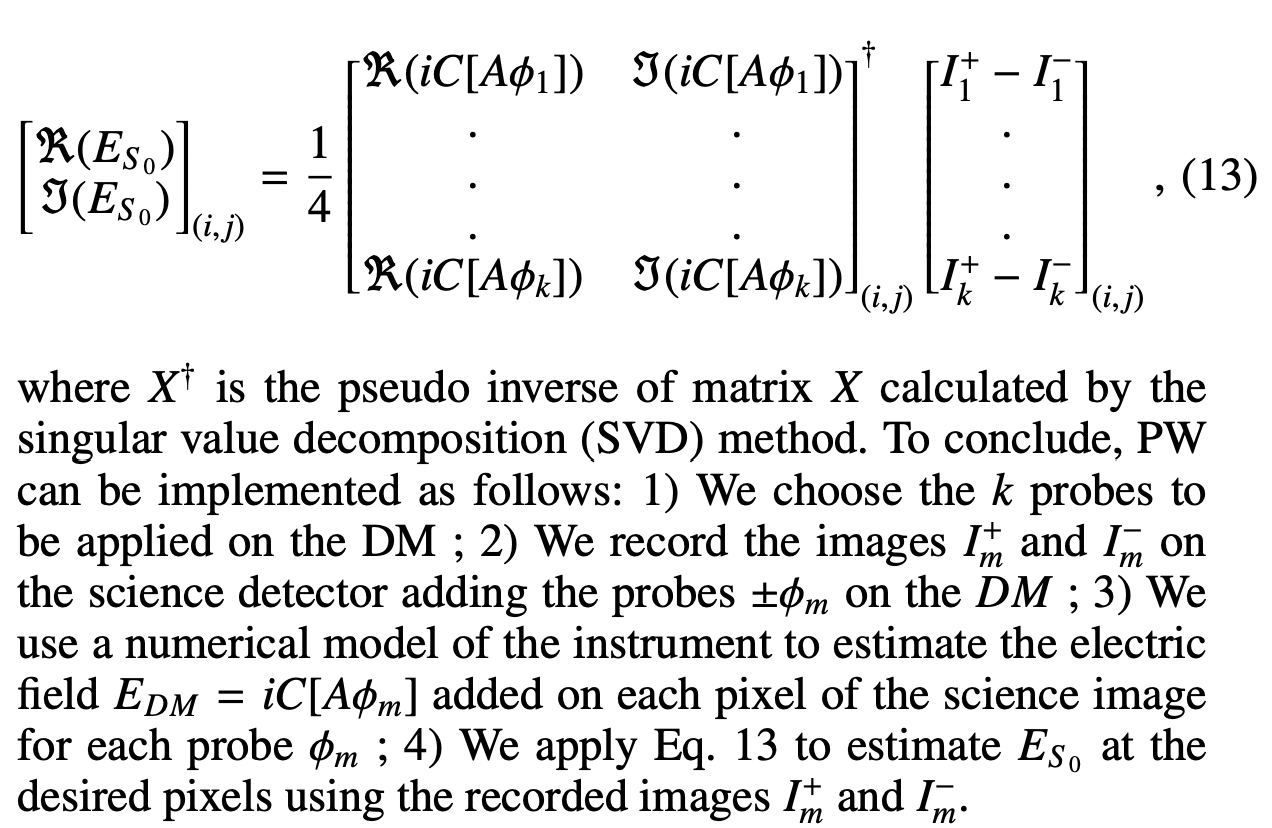

Generating probe with amplitude=2.063e-08, radius=12.0, phase=0.000, offset=(8.0,8.0), with discontinuity along x axis.
Generating probe with amplitude=2.063e-08, radius=12.0, phase=1.571, offset=(8.0,8.0), with discontinuity along y axis.


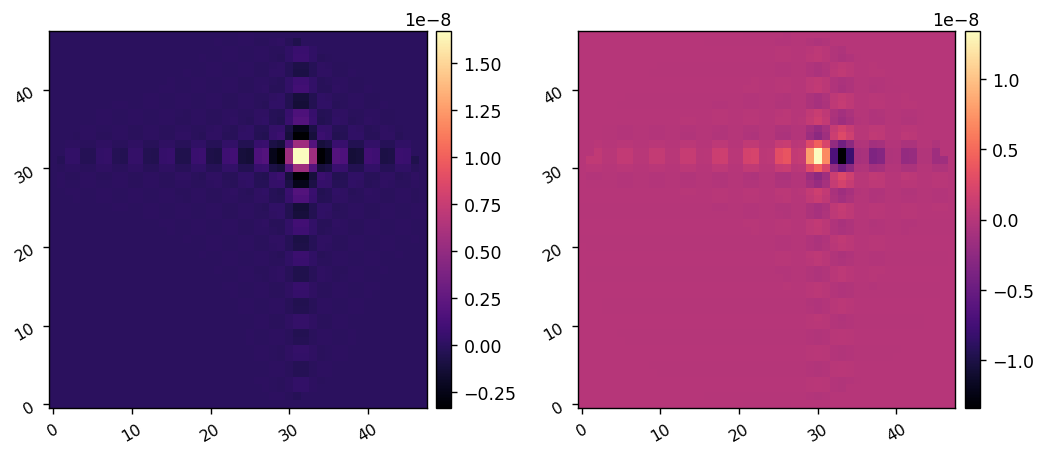

In [23]:
reload(efc)

Npairs = 2
probe_amp = 0.025*sys.wavelength_c.value
probe_radius = 12
probe_offset = (8,8)

probes = efc.create_sinc_probes(Npairs, Nact, sys.dm_mask, probe_amp, probe_radius, probe_offset, display=True)

In [ ]:
reload(efc)

sys.reset_dms()
E_est = efc.run_pwp(sys, probes, jac, dh_mask, reg_cond=1e-3, use_noise=False, display=True)
diff = abs(ref_psf*dh_mask - np.abs(E_est)**2)

vmin = 1e-12
vmax = ref_psf.max()
misc.myimshow3(np.abs(E_est)**2, 
               ref_psf*dh_mask, diff,
               'Estimated Intensity', 'Exact Intensity', 'Intensity Difference',
               lognorm1=True, lognorm2=True, lognorm3=True,
               vmin1=vmin, vmin2=vmin, vmin3=vmin,
               vmax1=vmax, vmax2=vmax, vmax3=vmax,
              )


np.mean(ref_psf[dh_mask]), np.mean(diff[dh_mask])

# Invert the Jacobian to get the control matrix

In [9]:
reload(efc)
rcond = 5e-2

tik_matrix = utils.TikhonovInverse(cp.array(jac_new), rcond).get()
tik_matrix.shape

(4608, 73968)

In [10]:
reload(utils)

beta = -2

beta_matrix = utils.jpl_reg(cp.array(jac_new), beta).get()
beta_matrix.shape

286275240392.0653


(4608, 73968)

# Run EFC with perfect model

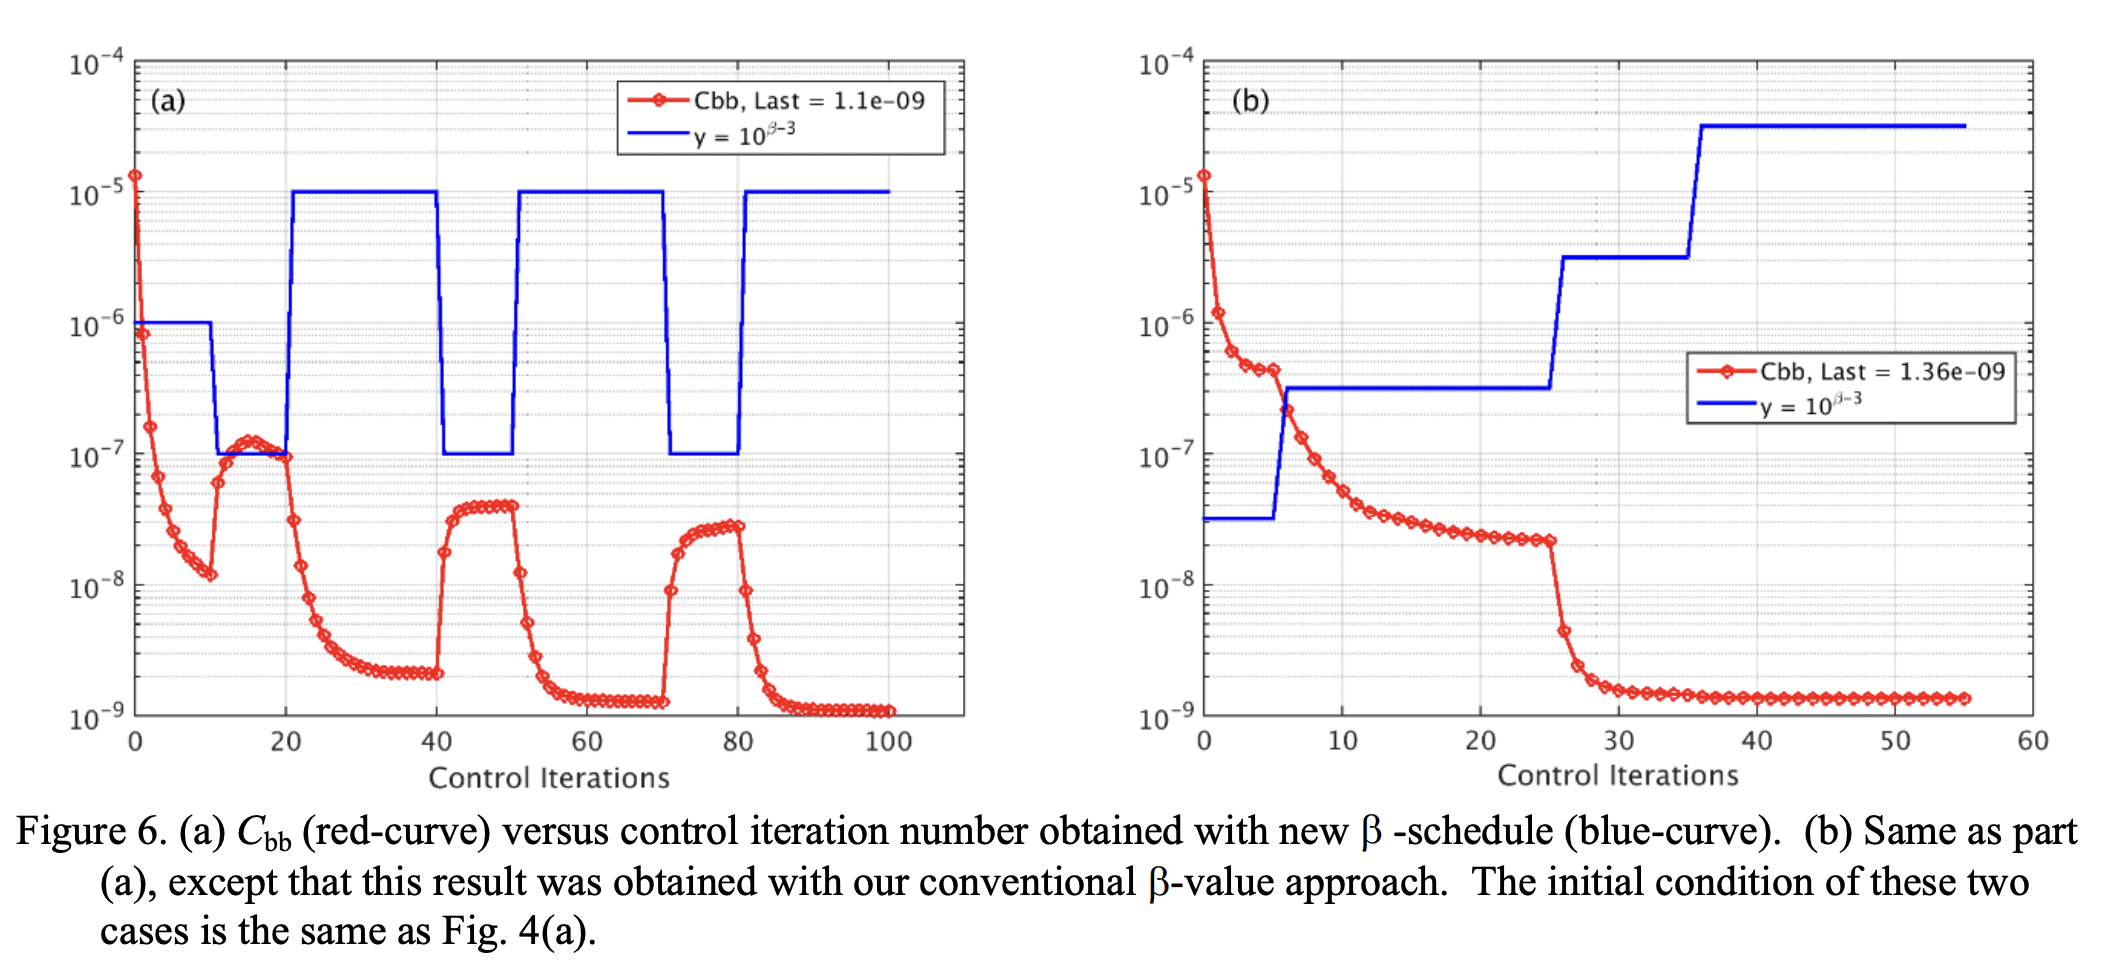

Beginning closed-loop EFC simulation.
	Running iteration 1/30.


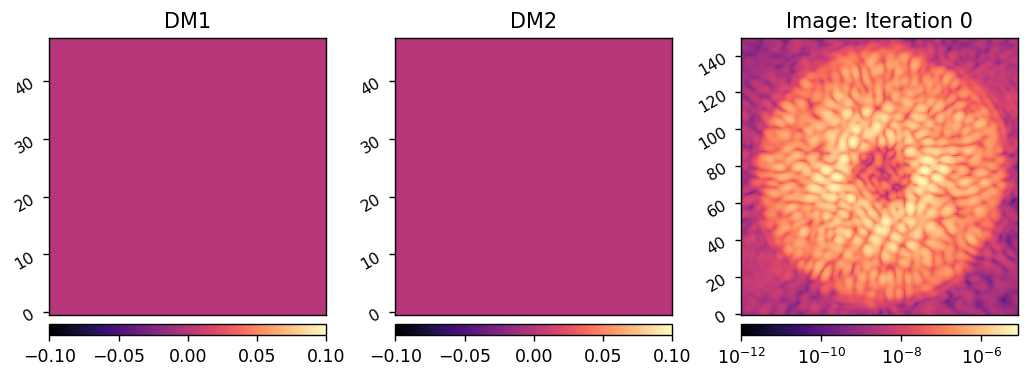

	Running iteration 2/30.


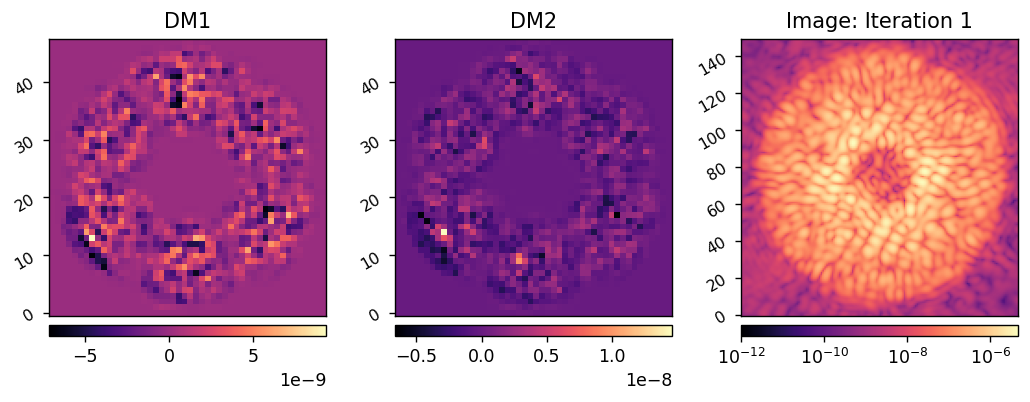

	Running iteration 3/30.


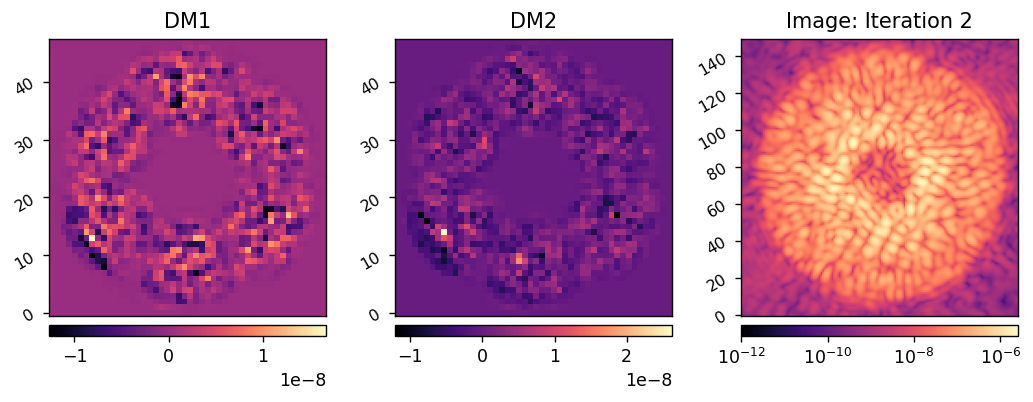

	Running iteration 4/30.


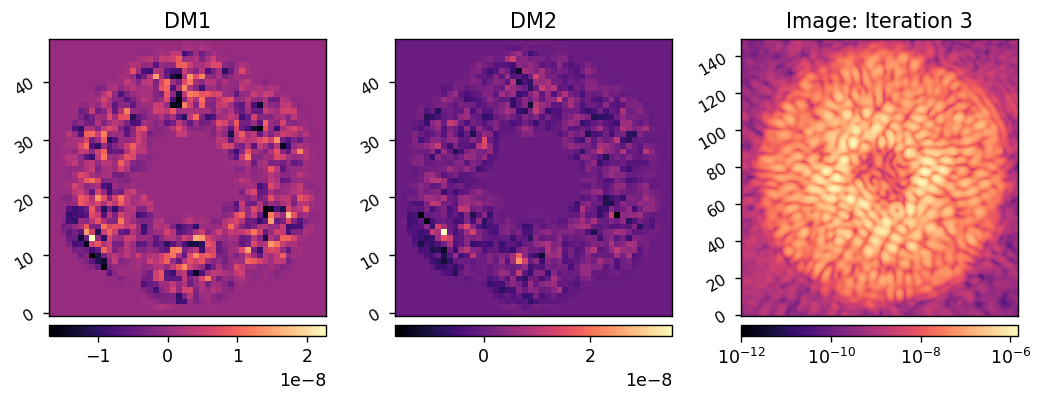

	Running iteration 5/30.


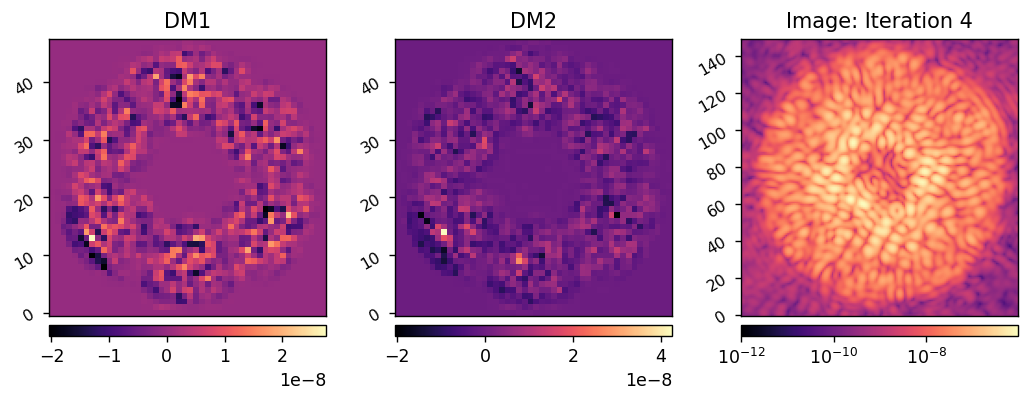

	Running iteration 6/30.


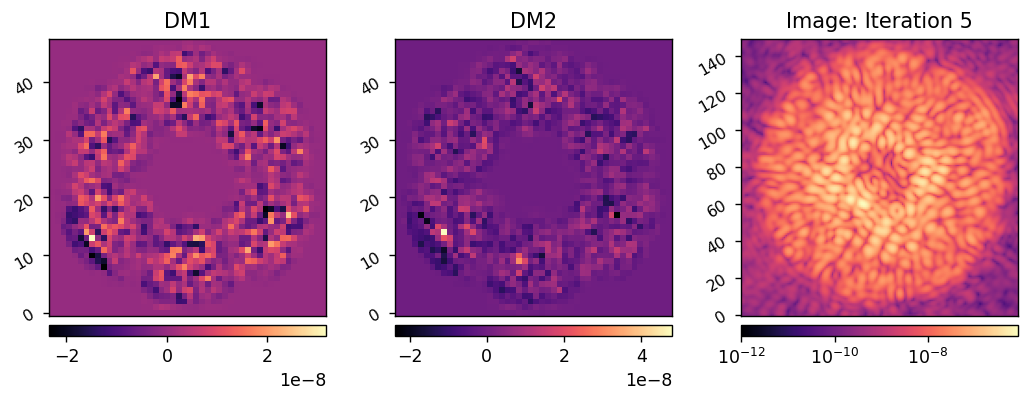

	Running iteration 7/30.


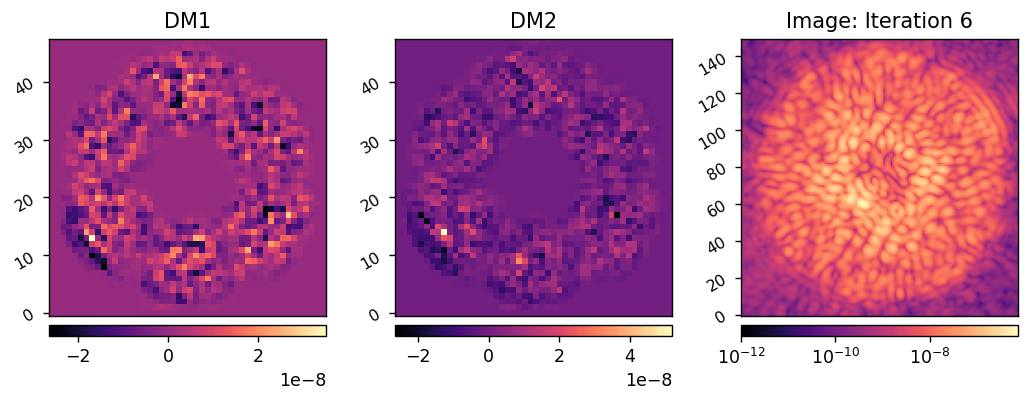

	Running iteration 8/30.


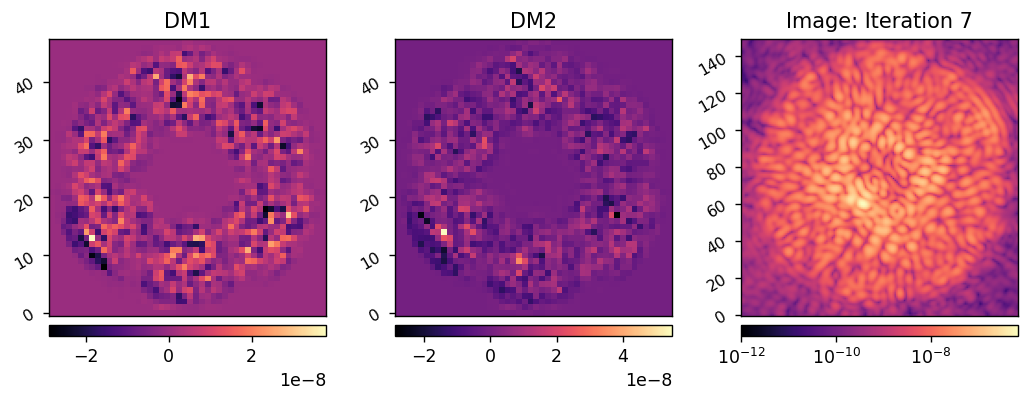

	Running iteration 9/30.


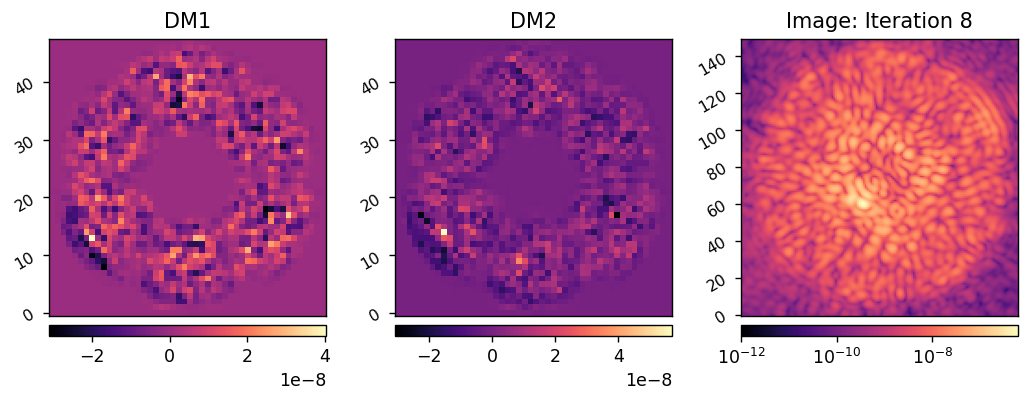

	Running iteration 10/30.


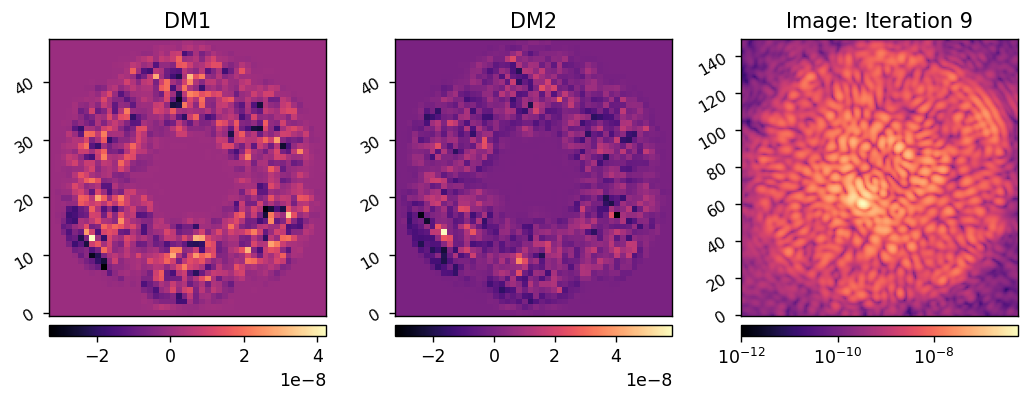

	Running iteration 11/30.


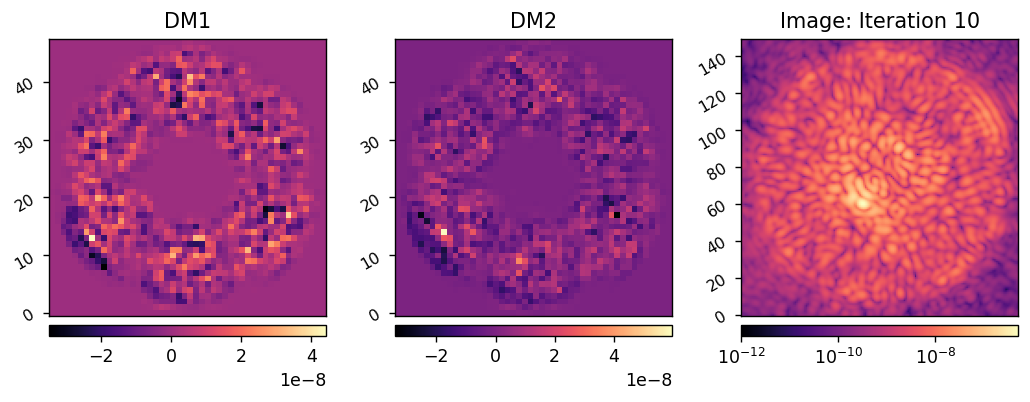

	Running iteration 12/30.


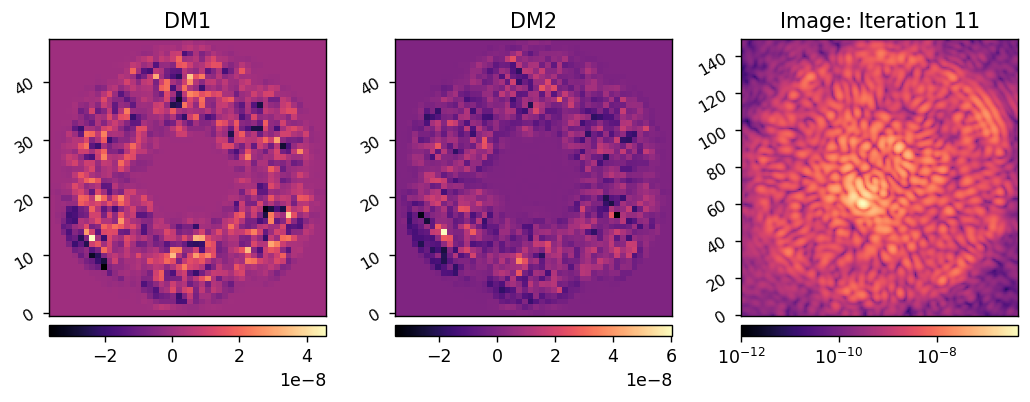

	Running iteration 13/30.


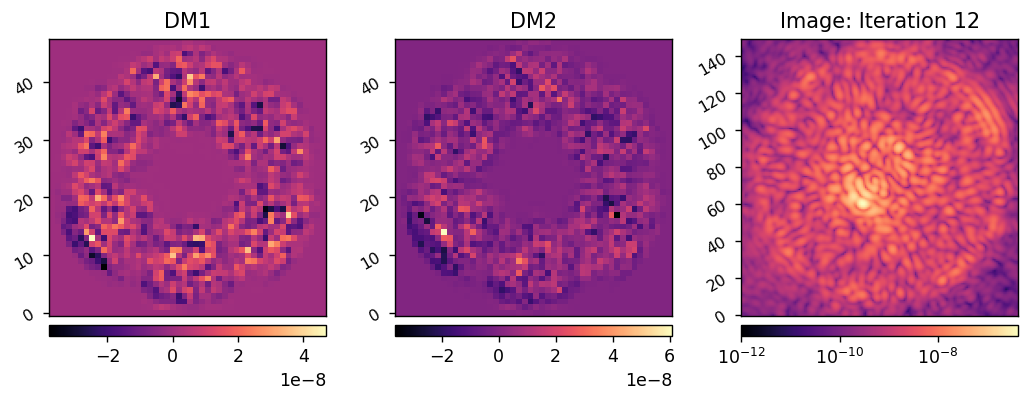

	Running iteration 14/30.


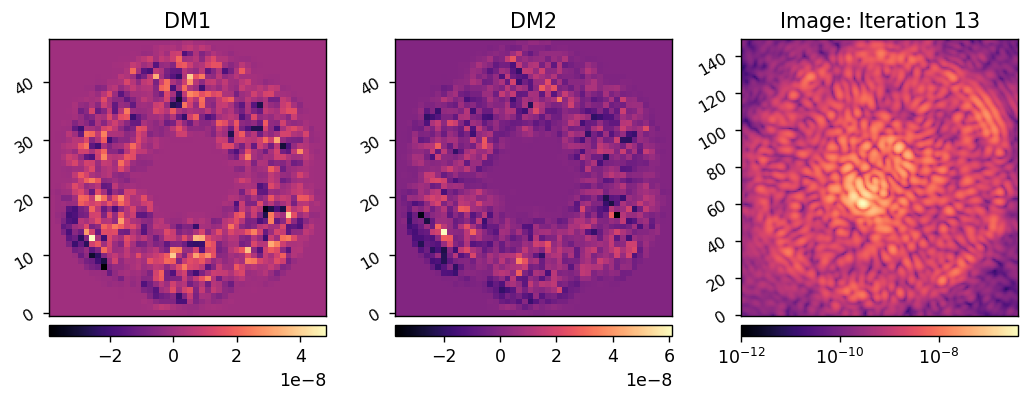

	Running iteration 15/30.


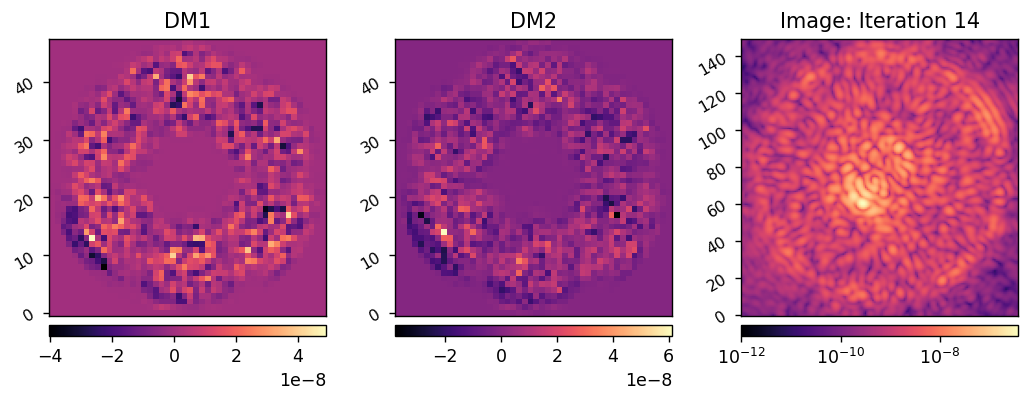

	Running iteration 16/30.


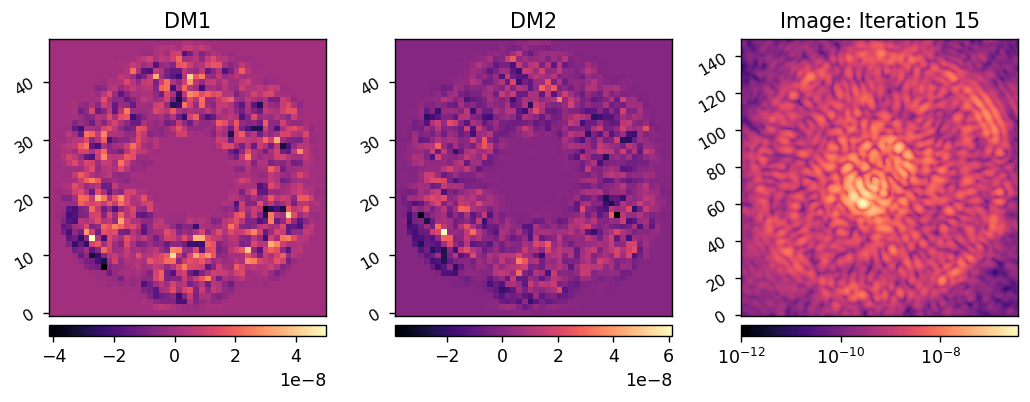

	Running iteration 17/30.


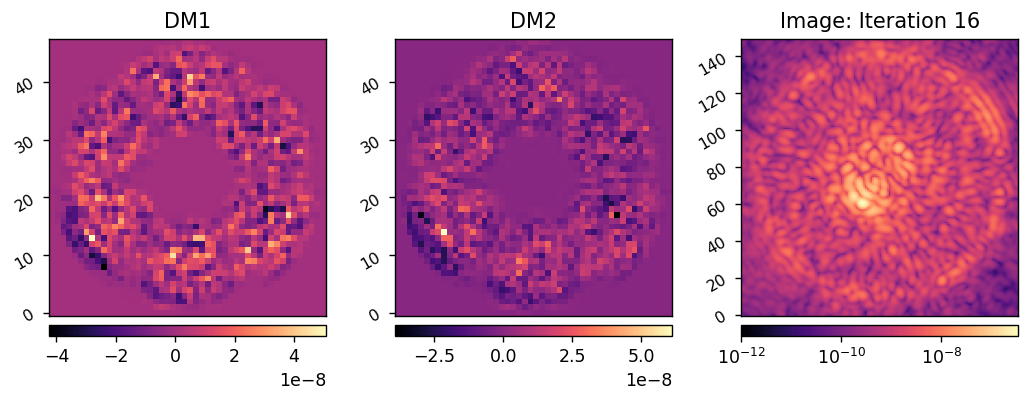

	Running iteration 18/30.


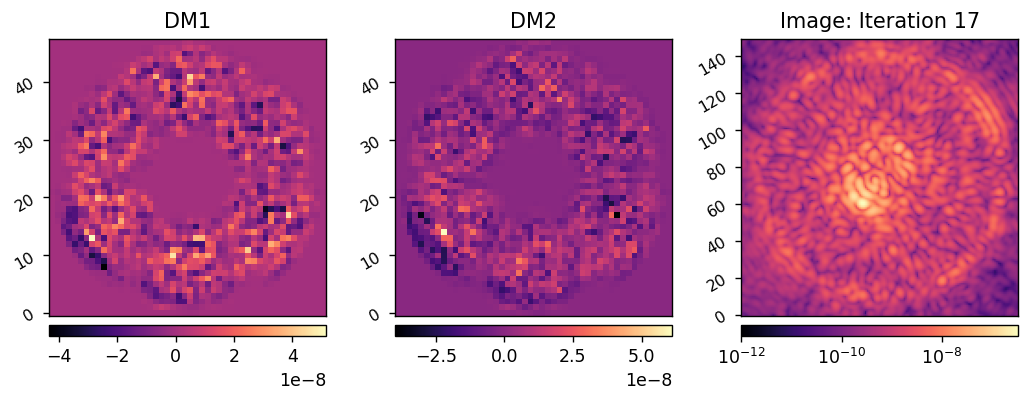

	Running iteration 19/30.


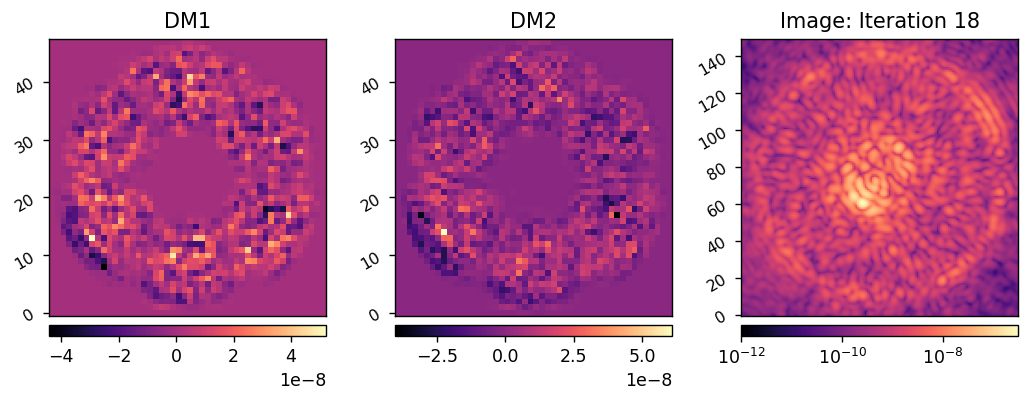

	Running iteration 20/30.


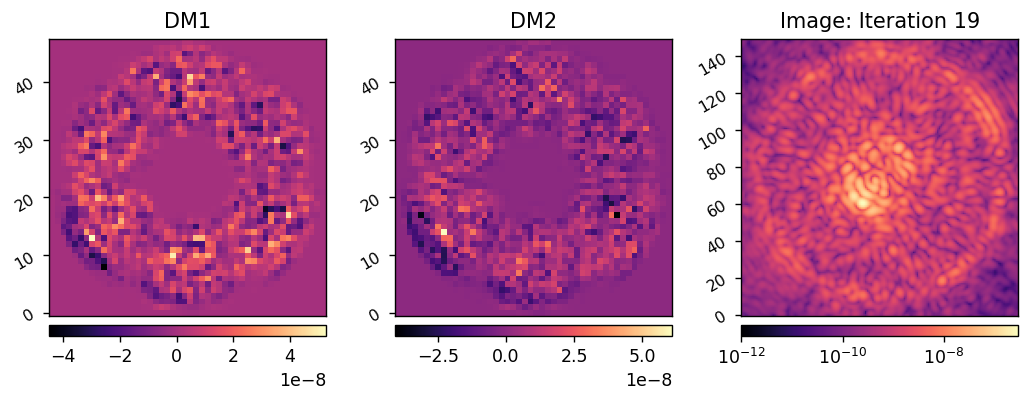

	Running iteration 21/30.


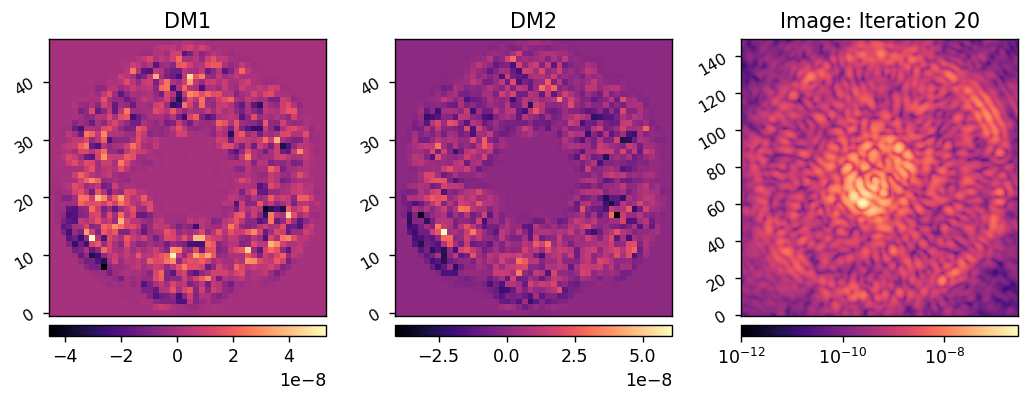

	Running iteration 22/30.


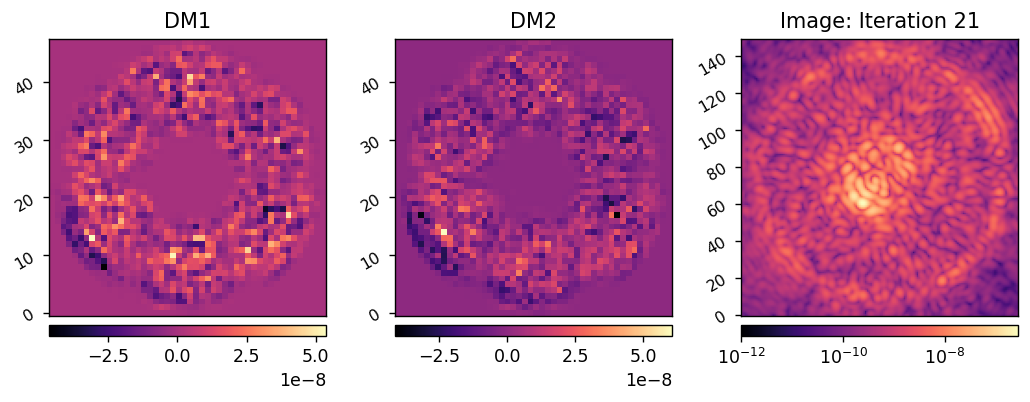

	Running iteration 23/30.


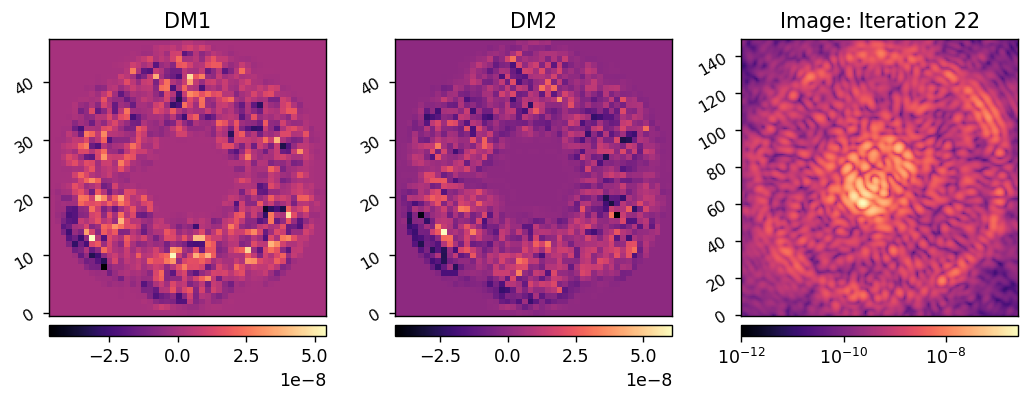

	Running iteration 24/30.


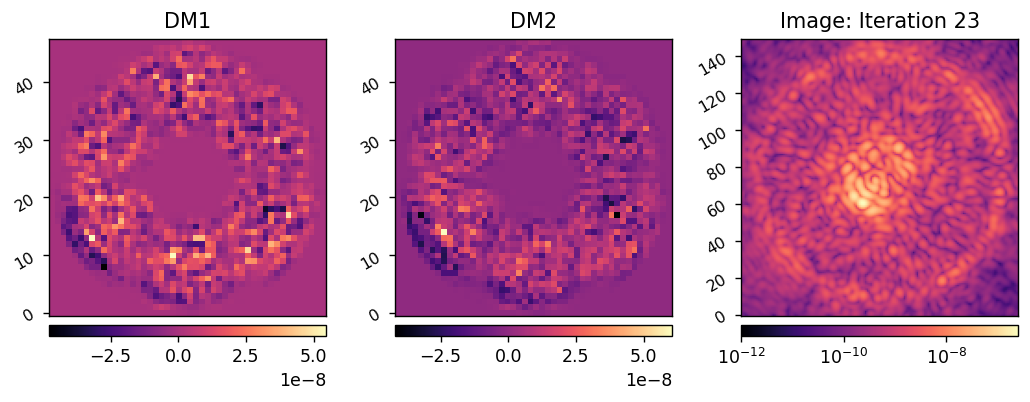

	Running iteration 25/30.


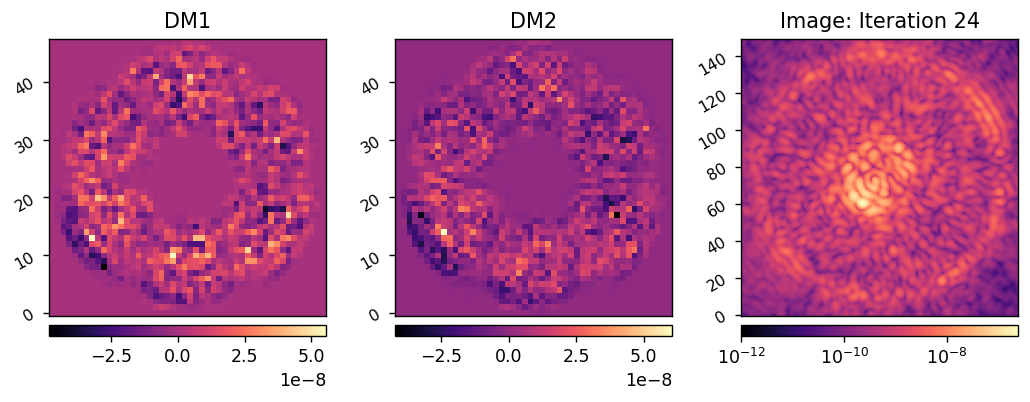

	Running iteration 26/30.


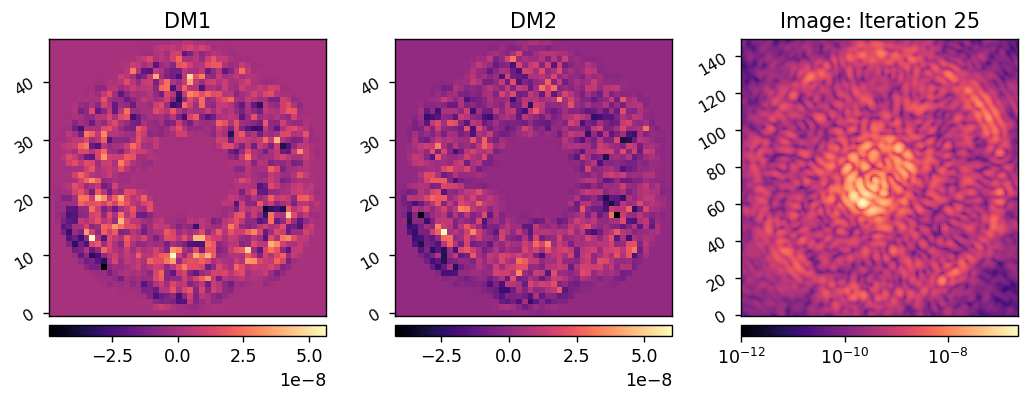

	Running iteration 27/30.


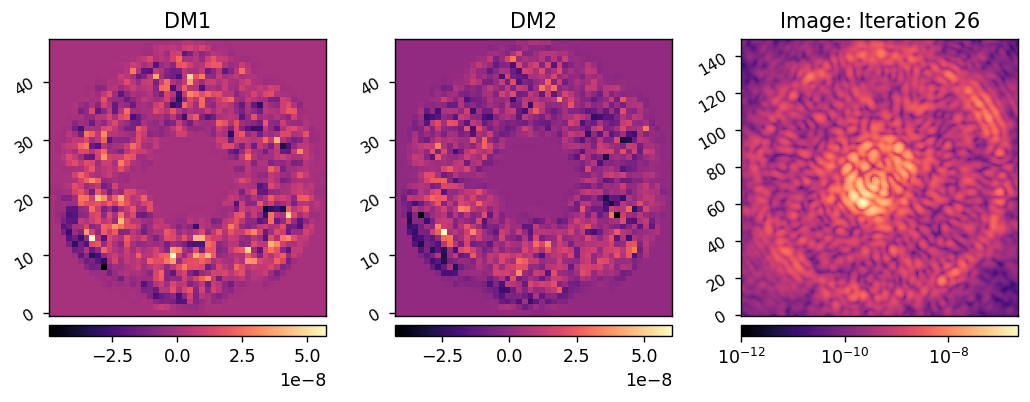

	Running iteration 28/30.


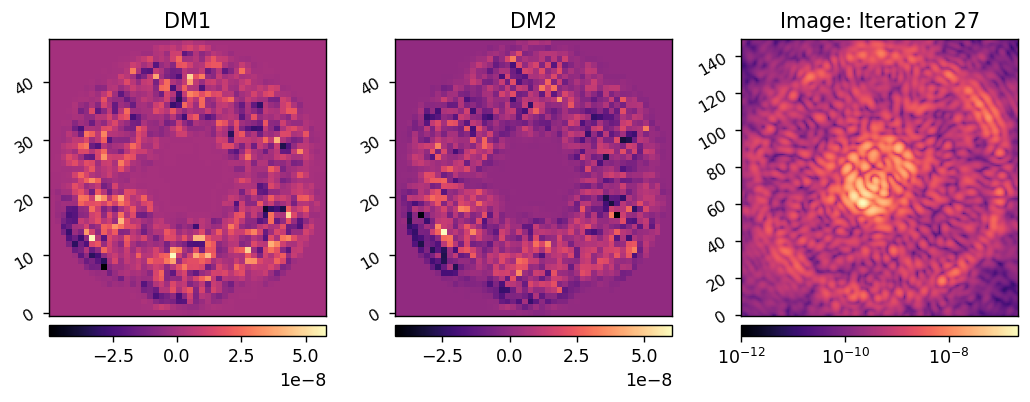

	Running iteration 29/30.


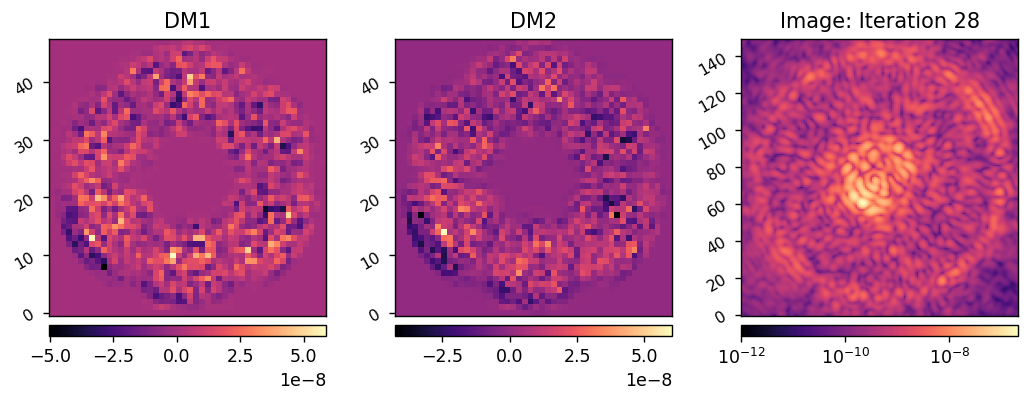

	Running iteration 30/30.


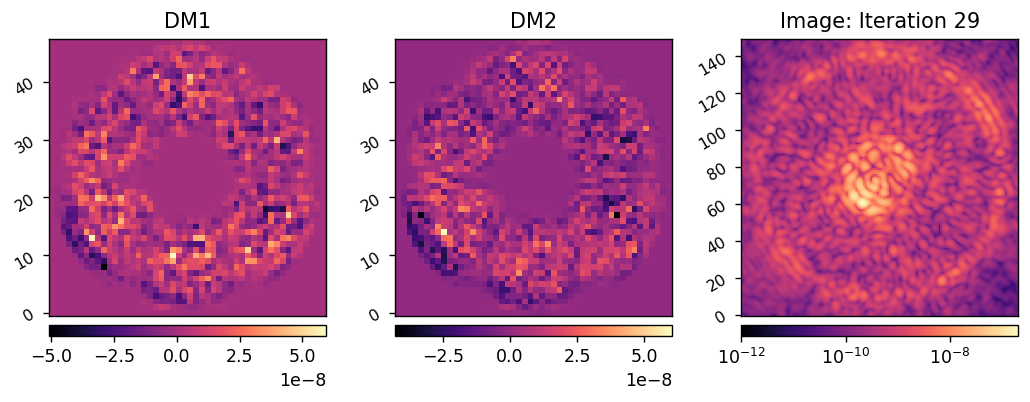

EFC completed in 49.479 sec.


In [11]:
reload(efc)
sys.reset_dms()
dm1_commands1, dm2_commands1, efields1 = efc.run_efc_perfect(sys, 
                                                             wavelengths,
                                                             jac_new, 
                                                             beta_matrix, 
                                                             dh_mask,
                                                             iterations=30, 
                                                             display=True,
                                                             plot_sms=True)

# Run EFC with PWP

In [39]:
reload(efc)
hlc.reset_dms()
commands2, efields2, images2 = efc.run_efc_pwp(sys, efc_matrix, jac, probes, dh_mask, iterations=10, display=False)

Beginning closed-loop EFC simulation.
	Running iteration 1/10.
	Running iteration 2/10.
	Running iteration 3/10.
	Running iteration 4/10.
	Running iteration 5/10.
	Running iteration 6/10.
	Running iteration 7/10.
	Running iteration 8/10.
	Running iteration 9/10.
	Running iteration 10/10.
EFC completed in 16.262 sec.
